In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('data.csv')
df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1


### 1. 응답자 연령대 분포
- 10대, 20대 분포가 전체의 약 60%를 차지한다. 
- 연령대 증가할수록 응답자 감소

In [46]:
ordered=['10s','20s','30s','40s','50s','60s','+70s']
ordered_includeall=['10s','20s','30s','40s','50s','60s','+70s','All']
pivot1=pd.pivot_table(df, values='index',index='age_group',aggfunc='count',margins=True)
pivot1=pivot1.reindex(ordered_includeall)
pivot1

,index
age_group,
10s,14215
20s,14112
30s,7836
40s,5051
50s,2889
60s,1194
+70s,235
All,45532


In [47]:
(pivot1/pivot1.loc['All'])*100

,index
age_group,
10s,31.219801
20s,30.993587
30s,17.209874
40s,11.093297
50s,6.344988
60s,2.622332
+70s,0.516121
All,100.000000


<AxesSubplot:xlabel='age_group', ylabel='count'>

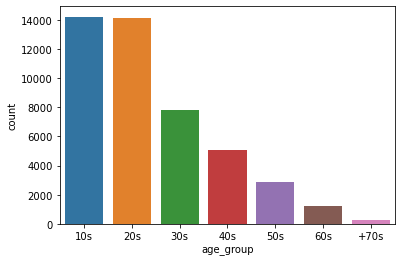

In [48]:
ordered=['10s','20s','30s','40s','50s','60s','+70s']
sns.countplot(x='age_group',data=df,order=ordered)

### 2. 연령대-설문조사 응답내용(QaA-QtA); 마키아벨리 성향
- 연령대 높아질수록 중립을 택하는 비율이 적다.
- 연령대 높아질수록 마키아벨리 성향이 줄어든다.

In [49]:
#질문유형표시
import string
lst=[]
for i in string.ascii_lowercase[:20]:
    lst.append('Q%sA'%i)
questiontype=pd.DataFrame(np.zeros(20)).T
questiontype.columns=lst
questiontype.index=['질문유형']
questiontype[['QaA','QdA','QgA','QiA','QlA','QnA','QpA','QtA']]=np.nan
questiontype[['QbA','QcA','QhA','QjA','QmA','QoA','QsA']]='+' #긍정적인 성향(마키아벨리 성향)
questiontype[['QeA','QfA','QkA','QqA','QrA']]='-' #부정적인 성향

questiontype

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
질문유형,NaN,+,+,NaN,-,-,NaN,+,NaN,+,-,NaN,+,NaN,+,NaN,-,-,+,NaN


In [50]:
#모든질문에 대해 해야되니까 아에 함수로 만들자!
def question_age_distribution(question):
    pivot2=pd.pivot_table(df,values='index',index=question,columns='age_group',aggfunc='count',margins=True)
    pivot2=pivot2.reindex(ordered_includeall,axis=1)
    print('%s 연령별 응답 총 개수'%question)
    display(pivot2)

    pivot3=(pivot2/pivot2.loc['All'])*100
    print('%s 연령별 응답 비율'%question)
    display(round(pivot3,1))
    
    #연령대별 응답분포 그래프
    pivot3.reset_index(inplace=True)
    fig,axes=plt.subplots(nrows=1,ncols=7,figsize=(20,5))
    axes[0].bar(pivot3[question].tolist()[0:5],pivot3['10s'].tolist()[0:5])
    axes[1].bar(pivot3[question].tolist()[0:5],pivot3['20s'].tolist()[0:5])
    axes[2].bar(pivot3[question].tolist()[0:5],pivot3['30s'].tolist()[0:5])
    axes[3].bar(pivot3[question].tolist()[0:5],pivot3['40s'].tolist()[0:5])
    axes[4].bar(pivot3[question].tolist()[0:5],pivot3['50s'].tolist()[0:5])
    axes[5].bar(pivot3[question].tolist()[0:5],pivot3['60s'].tolist()[0:5])
    axes[6].bar(pivot3[question].tolist()[0:5],pivot3['+70s'].tolist()[0:5])

    axes[0].set_xlabel('10s')
    axes[1].set_xlabel('20s')
    axes[2].set_xlabel('30s')
    axes[3].set_xlabel('40s')
    axes[4].set_xlabel('50s')
    axes[5].set_xlabel('60s')
    axes[6].set_xlabel('+70s')
    
    axes[0].set_yticks(np.arange(0,80,10))
    axes[1].set_yticks(np.arange(0,80,10))
    axes[2].set_yticks(np.arange(0,80,10))
    axes[3].set_yticks(np.arange(0,80,10))
    axes[4].set_yticks(np.arange(0,80,10))
    axes[5].set_yticks(np.arange(0,80,10))
    axes[6].set_yticks(np.arange(0,80,10))   

    axes[0].set_title(question,loc='left',fontsize=20)


QaA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QaA,,,,,,,,
1.0,5719,6109,3201,1754,945,350,83,18161
2.0,4203,3947,2254,1405,732,305,66,12912
3.0,2315,2082,1189,833,493,201,34,7147
4.0,1391,1352,814,718,480,232,37,5024
5.0,587,622,378,341,239,106,15,2288
All,14215,14112,7836,5051,2889,1194,235,45532


QaA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QaA,,,,,,,,
1.0,40.2,43.3,40.8,34.7,32.7,29.3,35.3,39.9
2.0,29.6,28.0,28.8,27.8,25.3,25.5,28.1,28.4
3.0,16.3,14.8,15.2,16.5,17.1,16.8,14.5,15.7
4.0,9.8,9.6,10.4,14.2,16.6,19.4,15.7,11.0
5.0,4.1,4.4,4.8,6.8,8.3,8.9,6.4,5.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QbA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QbA,,,,,,,,
1.0,2753,3854,2639,2044,1361,653,123,13427
2.0,2275,2513,1540,875,440,164,23,7830
3.0,1300,1399,687,391,198,67,10,4052
4.0,3536,3201,1623,1032,494,188,38,10112
5.0,4351,3145,1347,709,396,122,41,10111
All,14215,14112,7836,5051,2889,1194,235,45532


QbA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QbA,,,,,,,,
1.0,19.4,27.3,33.7,40.5,47.1,54.7,52.3,29.5
2.0,16.0,17.8,19.7,17.3,15.2,13.7,9.8,17.2
3.0,9.1,9.9,8.8,7.7,6.9,5.6,4.3,8.9
4.0,24.9,22.7,20.7,20.4,17.1,15.7,16.2,22.2
5.0,30.6,22.3,17.2,14.0,13.7,10.2,17.4,22.2
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QcA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QcA,,,,,,,,
1.0,1597,1535,1023,851,528,228,47,5809
2.0,1943,1807,1108,703,399,169,32,6161
3.0,1278,1137,575,331,180,81,14,3596
4.0,3575,3697,2136,1382,799,349,57,11995
5.0,5822,5936,2994,1784,983,367,85,17971
All,14215,14112,7836,5051,2889,1194,235,45532


QcA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QcA,,,,,,,,
1.0,11.2,10.9,13.1,16.8,18.3,19.1,20.0,12.8
2.0,13.7,12.8,14.1,13.9,13.8,14.2,13.6,13.5
3.0,9.0,8.1,7.3,6.6,6.2,6.8,6.0,7.9
4.0,25.1,26.2,27.3,27.4,27.7,29.2,24.3,26.3
5.0,41.0,42.1,38.2,35.3,34.0,30.7,36.2,39.5
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QdA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QdA,,,,,,,,
1.0,7902,8003,4514,2684,1492,525,118,25238
2.0,3707,3661,1973,1342,718,348,57,11806
3.0,1370,1423,757,510,326,138,17,4541
4.0,825,668,403,326,211,109,27,2569
5.0,411,357,189,189,142,74,16,1378
All,14215,14112,7836,5051,2889,1194,235,45532


QdA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QdA,,,,,,,,
1.0,55.6,56.7,57.6,53.1,51.6,44.0,50.2,55.4
2.0,26.1,25.9,25.2,26.6,24.9,29.1,24.3,25.9
3.0,9.6,10.1,9.7,10.1,11.3,11.6,7.2,10.0
4.0,5.8,4.7,5.1,6.5,7.3,9.1,11.5,5.6
5.0,2.9,2.5,2.4,3.7,4.9,6.2,6.8,3.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QeA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QeA,,,,,,,,
1.0,5174,5541,3337,2060,1147,442,80,17781
2.0,3453,3268,1736,1127,594,242,39,10459
3.0,2803,2413,1061,606,302,114,22,7321
4.0,1463,1424,854,610,400,182,43,4976
5.0,1322,1466,848,648,446,214,51,4995
All,14215,14112,7836,5051,2889,1194,235,45532


QeA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QeA,,,,,,,,
1.0,36.4,39.3,42.6,40.8,39.7,37.0,34.0,39.1
2.0,24.3,23.2,22.2,22.3,20.6,20.3,16.6,23.0
3.0,19.7,17.1,13.5,12.0,10.5,9.5,9.4,16.1
4.0,10.3,10.1,10.9,12.1,13.8,15.2,18.3,10.9
5.0,9.3,10.4,10.8,12.8,15.4,17.9,21.7,11.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QfA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QfA,,,,,,,,
1.0,6915,6308,3221,1786,941,339,67,19577
2.0,3744,3985,2262,1531,832,368,72,12794
3.0,1203,1169,675,355,176,76,9,3663
4.0,1217,1412,906,704,452,186,47,4924
5.0,1136,1238,772,675,488,225,40,4574
All,14215,14112,7836,5051,2889,1194,235,45532


QfA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QfA,,,,,,,,
1.0,48.6,44.7,41.1,35.4,32.6,28.4,28.5,43.0
2.0,26.3,28.2,28.9,30.3,28.8,30.8,30.6,28.1
3.0,8.5,8.3,8.6,7.0,6.1,6.4,3.8,8.0
4.0,8.6,10.0,11.6,13.9,15.6,15.6,20.0,10.8
5.0,8.0,8.8,9.9,13.4,16.9,18.8,17.0,10.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QgA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QgA,,,,,,,,
1.0,5337,5159,2728,1675,938,401,91,16329
2.0,3057,3117,1756,1067,614,284,52,9947
3.0,1413,1336,664,394,188,57,20,4072
4.0,2318,2360,1378,936,542,195,41,7770
5.0,2090,2140,1310,979,607,257,31,7414
All,14215,14112,7836,5051,2889,1194,235,45532


QgA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QgA,,,,,,,,
1.0,37.5,36.6,34.8,33.2,32.5,33.6,38.7,35.9
2.0,21.5,22.1,22.4,21.1,21.3,23.8,22.1,21.8
3.0,9.9,9.5,8.5,7.8,6.5,4.8,8.5,8.9
4.0,16.3,16.7,17.6,18.5,18.8,16.3,17.4,17.1
5.0,14.7,15.2,16.7,19.4,21.0,21.5,13.2,16.3
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QhA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QhA,,,,,,,,
1.0,5656,6051,3806,2763,1585,651,109,20621
2.0,2490,2318,1147,653,368,159,34,7169
3.0,2120,1982,976,551,286,104,34,6053
4.0,2122,1907,944,566,329,132,22,6022
5.0,1827,1854,963,518,321,148,36,5667
All,14215,14112,7836,5051,2889,1194,235,45532


QhA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QhA,,,,,,,,
1.0,39.8,42.9,48.6,54.7,54.9,54.5,46.4,45.3
2.0,17.5,16.4,14.6,12.9,12.7,13.3,14.5,15.7
3.0,14.9,14.0,12.5,10.9,9.9,8.7,14.5,13.3
4.0,14.9,13.5,12.0,11.2,11.4,11.1,9.4,13.2
5.0,12.9,13.1,12.3,10.3,11.1,12.4,15.3,12.4
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QiA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QiA,,,,,,,,
1.0,2931,2776,1320,693,360,113,40,8233
2.0,3408,3366,1633,981,427,150,19,9984
3.0,2172,1958,991,503,245,76,16,5961
4.0,2824,2779,1613,1012,573,237,40,9078
5.0,2880,3233,2279,1862,1284,618,120,12276
All,14215,14112,7836,5051,2889,1194,235,45532


QiA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QiA,,,,,,,,
1.0,20.6,19.7,16.8,13.7,12.5,9.5,17.0,18.1
2.0,24.0,23.9,20.8,19.4,14.8,12.6,8.1,21.9
3.0,15.3,13.9,12.6,10.0,8.5,6.4,6.8,13.1
4.0,19.9,19.7,20.6,20.0,19.8,19.8,17.0,19.9
5.0,20.3,22.9,29.1,36.9,44.4,51.8,51.1,27.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QjA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QjA,,,,,,,,
1.0,1041,1172,934,865,680,362,76,5130
2.0,1807,1988,1252,882,517,210,40,6696
3.0,1814,1565,843,474,266,98,20,5080
4.0,4436,4543,2409,1547,800,304,52,14091
5.0,5117,4844,2398,1283,626,220,47,14535
All,14215,14112,7836,5051,2889,1194,235,45532


QjA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QjA,,,,,,,,
1.0,7.3,8.3,11.9,17.1,23.5,30.3,32.3,11.3
2.0,12.7,14.1,16.0,17.5,17.9,17.6,17.0,14.7
3.0,12.8,11.1,10.8,9.4,9.2,8.2,8.5,11.2
4.0,31.2,32.2,30.7,30.6,27.7,25.5,22.1,30.9
5.0,36.0,34.3,30.6,25.4,21.7,18.4,20.0,31.9
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QkA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QkA,,,,,,,,
1.0,1892,1412,582,288,143,48,17,4382
2.0,2086,1789,733,339,150,76,15,5188
3.0,2302,2068,935,460,209,69,13,6056
4.0,2855,2930,1597,871,385,133,29,8800
5.0,5080,5913,3989,3093,2002,868,161,21106
All,14215,14112,7836,5051,2889,1194,235,45532


QkA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QkA,,,,,,,,
1.0,13.3,10.0,7.4,5.7,4.9,4.0,7.2,9.6
2.0,14.7,12.7,9.4,6.7,5.2,6.4,6.4,11.4
3.0,16.2,14.7,11.9,9.1,7.2,5.8,5.5,13.3
4.0,20.1,20.8,20.4,17.2,13.3,11.1,12.3,19.3
5.0,35.7,41.9,50.9,61.2,69.3,72.7,68.5,46.4
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QlA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QlA,,,,,,,,
1.0,715,752,457,397,319,121,26,2787
2.0,457,493,248,171,125,65,7,1566
3.0,1072,1047,572,423,282,109,25,3530
4.0,2364,2398,1339,915,520,223,36,7795
5.0,9607,9422,5220,3145,1643,676,141,29854
All,14215,14112,7836,5051,2889,1194,235,45532


QlA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QlA,,,,,,,,
1.0,5.0,5.3,5.8,7.9,11.0,10.1,11.1,6.1
2.0,3.2,3.5,3.2,3.4,4.3,5.4,3.0,3.4
3.0,7.5,7.4,7.3,8.4,9.8,9.1,10.6,7.8
4.0,16.6,17.0,17.1,18.1,18.0,18.7,15.3,17.1
5.0,67.6,66.8,66.6,62.3,56.9,56.6,60.0,65.6
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QmA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QmA,,,,,,,,
1.0,1116,1429,1214,1070,709,345,56,5939
2.0,1605,1949,1281,841,490,197,37,6400
3.0,1615,1638,782,454,255,94,16,4854
4.0,4983,4915,2480,1559,842,344,73,15196
5.0,4896,4181,2079,1127,593,214,53,13143
All,14215,14112,7836,5051,2889,1194,235,45532


QmA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QmA,,,,,,,,
1.0,7.9,10.1,15.5,21.2,24.5,28.9,23.8,13.0
2.0,11.3,13.8,16.3,16.7,17.0,16.5,15.7,14.1
3.0,11.4,11.6,10.0,9.0,8.8,7.9,6.8,10.7
4.0,35.1,34.8,31.6,30.9,29.1,28.8,31.1,33.4
5.0,34.4,29.6,26.5,22.3,20.5,17.9,22.6,28.9
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QnA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QnA,,,,,,,,
1.0,5175,4523,2391,1360,676,247,56,14428
2.0,3478,3391,1751,1117,614,274,36,10661
3.0,1604,1503,745,390,201,63,12,4518
4.0,2310,2741,1772,1197,689,280,59,9048
5.0,1648,1954,1177,987,709,330,72,6877
All,14215,14112,7836,5051,2889,1194,235,45532


QnA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QnA,,,,,,,,
1.0,36.4,32.1,30.5,26.9,23.4,20.7,23.8,31.7
2.0,24.5,24.0,22.3,22.1,21.3,22.9,15.3,23.4
3.0,11.3,10.7,9.5,7.7,7.0,5.3,5.1,9.9
4.0,16.3,19.4,22.6,23.7,23.8,23.5,25.1,19.9
5.0,11.6,13.8,15.0,19.5,24.5,27.6,30.6,15.1
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QoA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QoA,,,,,,,,
1.0,2013,2181,1706,1449,982,443,77,8851
2.0,2150,2299,1510,983,578,237,43,7800
3.0,1554,1530,892,531,245,114,22,4888
4.0,4012,4134,2167,1282,686,266,46,12593
5.0,4486,3968,1561,806,398,134,47,11400
All,14215,14112,7836,5051,2889,1194,235,45532


QoA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QoA,,,,,,,,
1.0,14.2,15.5,21.8,28.7,34.0,37.1,32.8,19.4
2.0,15.1,16.3,19.3,19.5,20.0,19.8,18.3,17.1
3.0,10.9,10.8,11.4,10.5,8.5,9.5,9.4,10.7
4.0,28.2,29.3,27.7,25.4,23.7,22.3,19.6,27.7
5.0,31.6,28.1,19.9,16.0,13.8,11.2,20.0,25.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QpA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QpA,,,,,,,,
1.0,2038,2535,1902,1606,1120,523,109,9833
2.0,2677,2887,1719,1149,588,250,50,9320
3.0,1510,1351,751,411,214,69,9,4315
4.0,4174,3848,1902,1112,594,210,35,11875
5.0,3816,3491,1562,773,373,142,32,10189
All,14215,14112,7836,5051,2889,1194,235,45532


QpA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QpA,,,,,,,,
1.0,14.3,18.0,24.3,31.8,38.8,43.8,46.4,21.6
2.0,18.8,20.5,21.9,22.7,20.4,20.9,21.3,20.5
3.0,10.6,9.6,9.6,8.1,7.4,5.8,3.8,9.5
4.0,29.4,27.3,24.3,22.0,20.6,17.6,14.9,26.1
5.0,26.8,24.7,19.9,15.3,12.9,11.9,13.6,22.4
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QqA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QqA,,,,,,,,
1.0,4491,3578,1597,796,377,157,35,11031
2.0,3390,2988,1461,773,426,158,26,9222
3.0,2616,2678,1408,812,373,144,22,8053
4.0,2496,3155,2074,1448,838,349,72,10432
5.0,1222,1713,1296,1222,875,386,80,6794
All,14215,14112,7836,5051,2889,1194,235,45532


QqA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QqA,,,,,,,,
1.0,31.6,25.4,20.4,15.8,13.0,13.1,14.9,24.2
2.0,23.8,21.2,18.6,15.3,14.7,13.2,11.1,20.3
3.0,18.4,19.0,18.0,16.1,12.9,12.1,9.4,17.7
4.0,17.6,22.4,26.5,28.7,29.0,29.2,30.6,22.9
5.0,8.6,12.1,16.5,24.2,30.3,32.3,34.0,14.9
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QrA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QrA,,,,,,,,
1.0,3635,3348,1781,1123,628,222,53,10790
2.0,3533,3531,1841,1133,607,218,42,10905
3.0,2405,2306,1188,666,317,128,20,7030
4.0,2675,2859,1688,1058,604,241,41,9166
5.0,1967,2068,1338,1071,733,385,79,7641
All,14215,14112,7836,5051,2889,1194,235,45532


QrA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QrA,,,,,,,,
1.0,25.6,23.7,22.7,22.2,21.7,18.6,22.6,23.7
2.0,24.9,25.0,23.5,22.4,21.0,18.3,17.9,24.0
3.0,16.9,16.3,15.2,13.2,11.0,10.7,8.5,15.4
4.0,18.8,20.3,21.5,20.9,20.9,20.2,17.4,20.1
5.0,13.8,14.7,17.1,21.2,25.4,32.2,33.6,16.8
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QsA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QsA,,,,,,,,
1.0,1226,1637,1315,1152,858,403,72,6663
2.0,1388,1593,1009,722,390,161,37,5300
3.0,2108,2345,1387,832,478,206,33,7389
4.0,4520,4585,2436,1452,712,263,53,14021
5.0,4973,3952,1689,893,451,161,40,12159
All,14215,14112,7836,5051,2889,1194,235,45532


QsA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QsA,,,,,,,,
1.0,8.6,11.6,16.8,22.8,29.7,33.8,30.6,14.6
2.0,9.8,11.3,12.9,14.3,13.5,13.5,15.7,11.6
3.0,14.8,16.6,17.7,16.5,16.5,17.3,14.0,16.2
4.0,31.8,32.5,31.1,28.7,24.6,22.0,22.6,30.8
5.0,35.0,28.0,21.6,17.7,15.6,13.5,17.0,26.7
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


QtA 연령별 응답 총 개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QtA,,,,,,,,
1.0,1807,2282,1904,1666,1040,506,96,9301
2.0,2310,2285,1464,866,487,191,39,7642
3.0,1673,1673,924,552,302,107,23,5254
4.0,3548,3293,1622,946,515,201,25,10150
5.0,4877,4579,1922,1021,545,189,52,13185
All,14215,14112,7836,5051,2889,1194,235,45532


QtA 연령별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
QtA,,,,,,,,
1.0,12.7,16.2,24.3,33.0,36.0,42.4,40.9,20.4
2.0,16.3,16.2,18.7,17.1,16.9,16.0,16.6,16.8
3.0,11.8,11.9,11.8,10.9,10.5,9.0,9.8,11.5
4.0,25.0,23.3,20.7,18.7,17.8,16.8,10.6,22.3
5.0,34.3,32.4,24.5,20.2,18.9,15.8,22.1,29.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


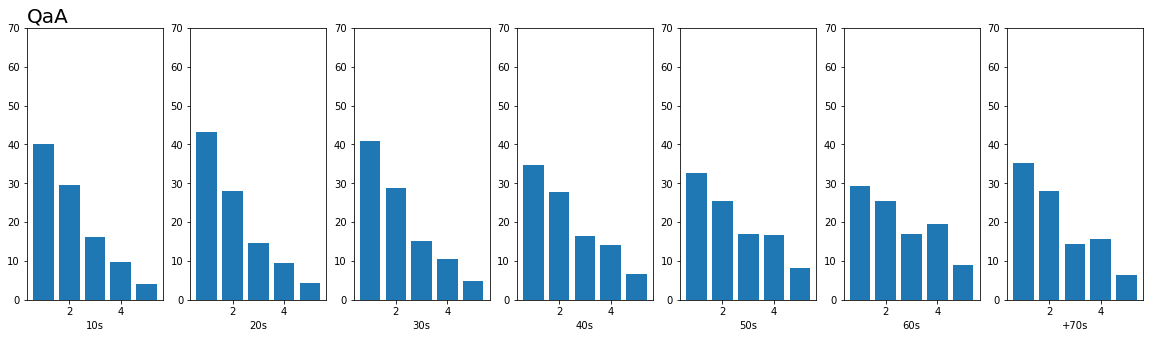

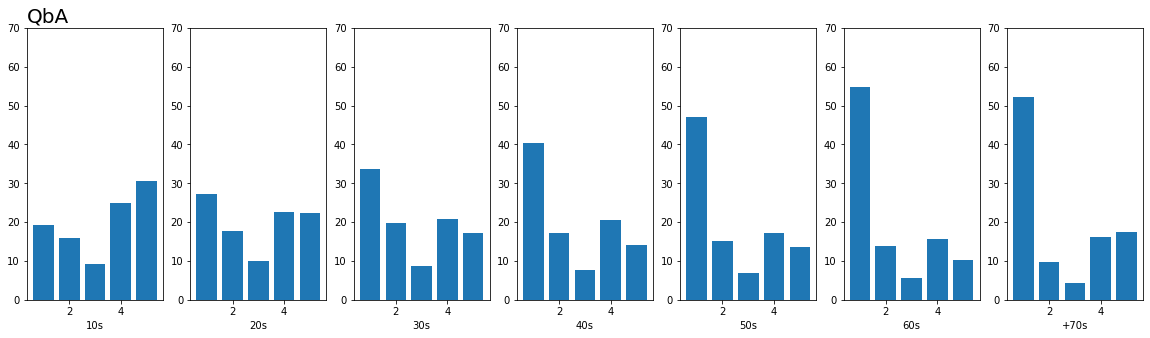

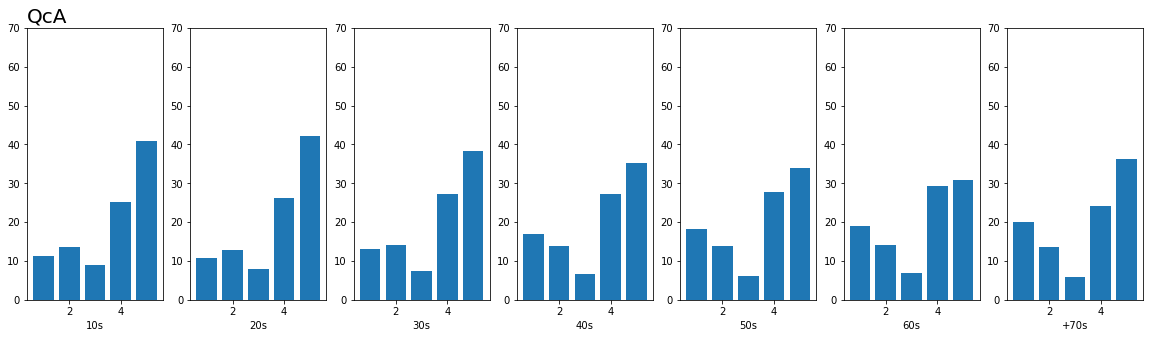

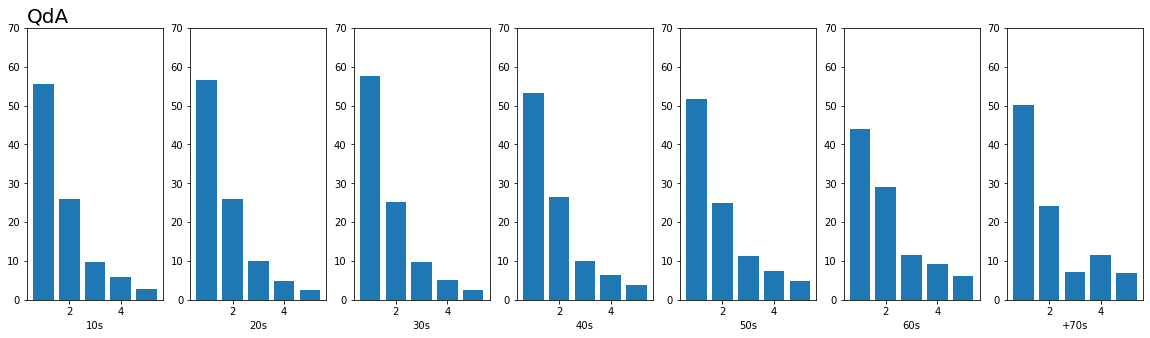

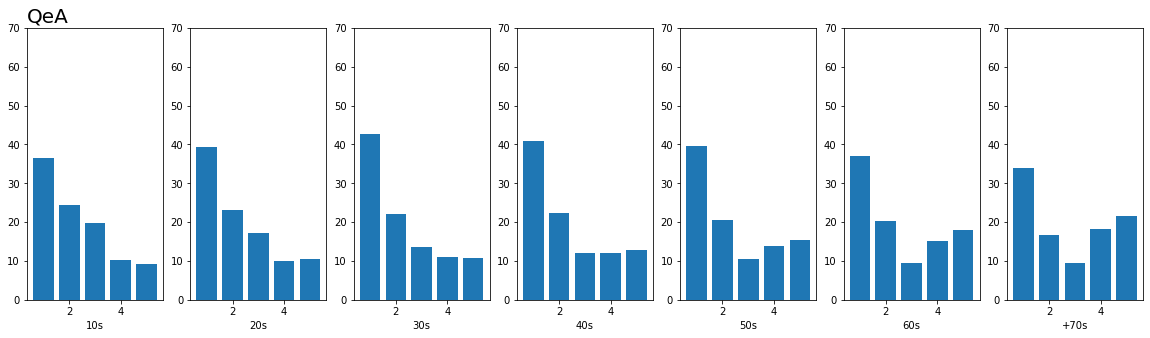

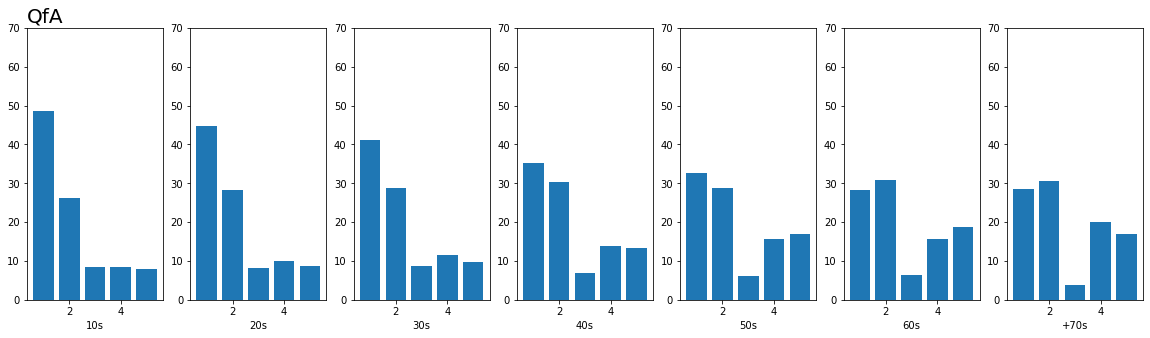

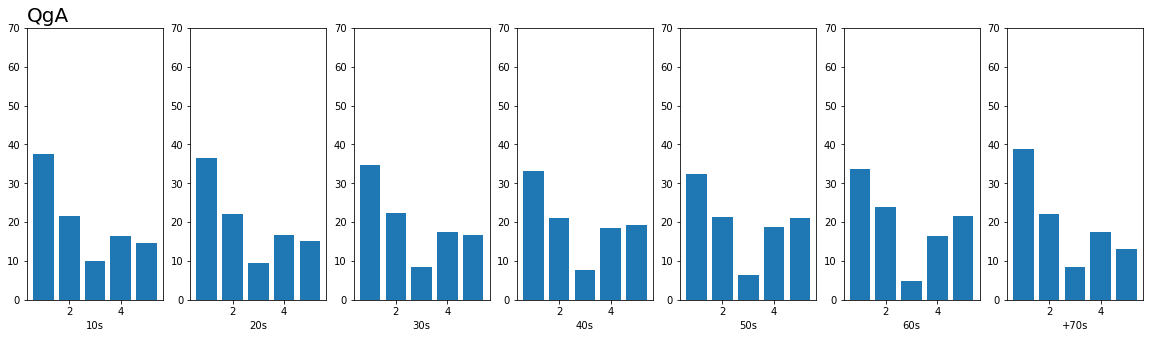

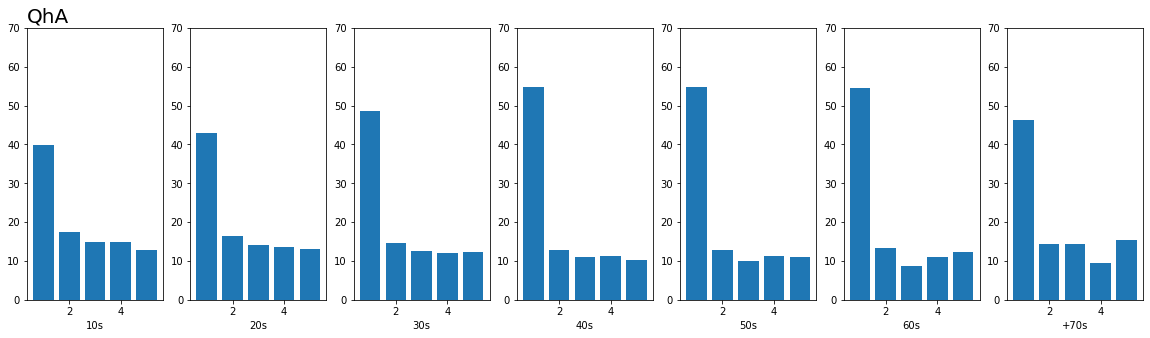

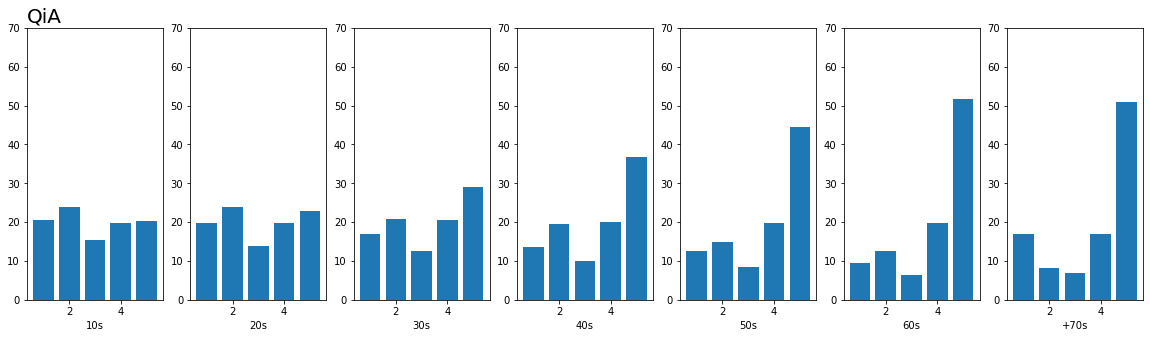

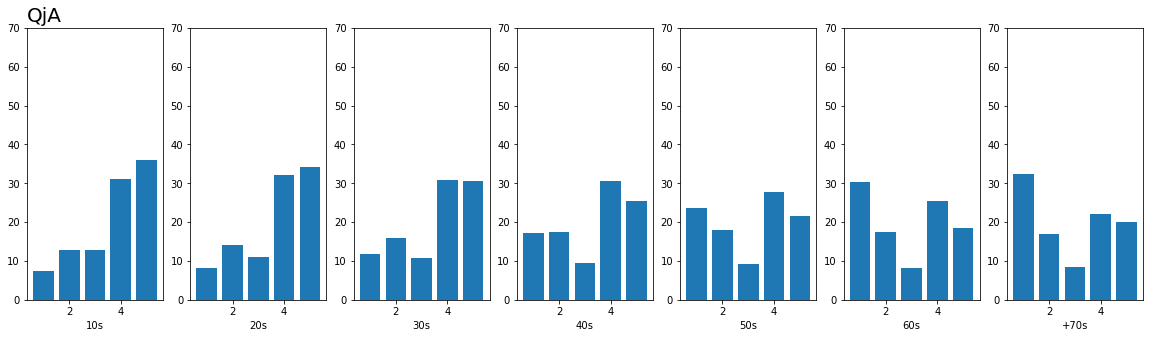

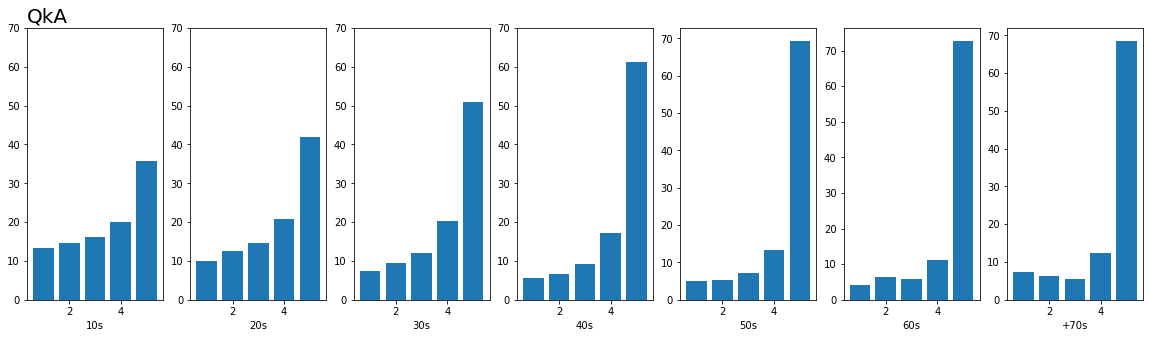

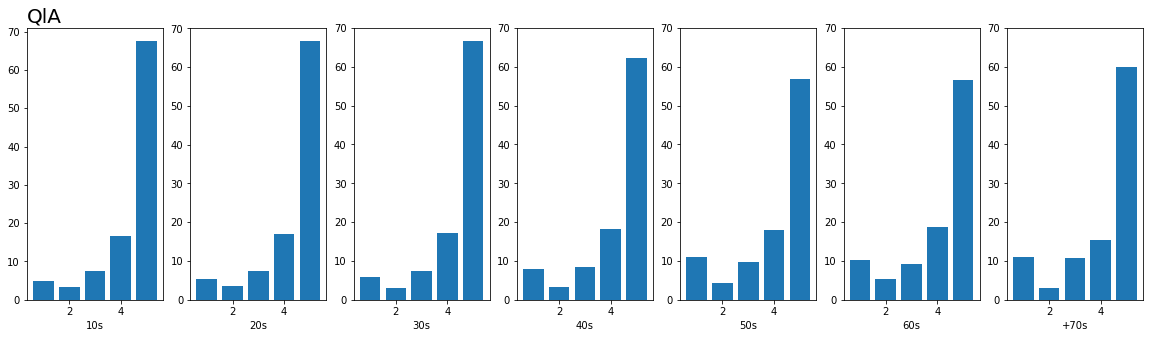

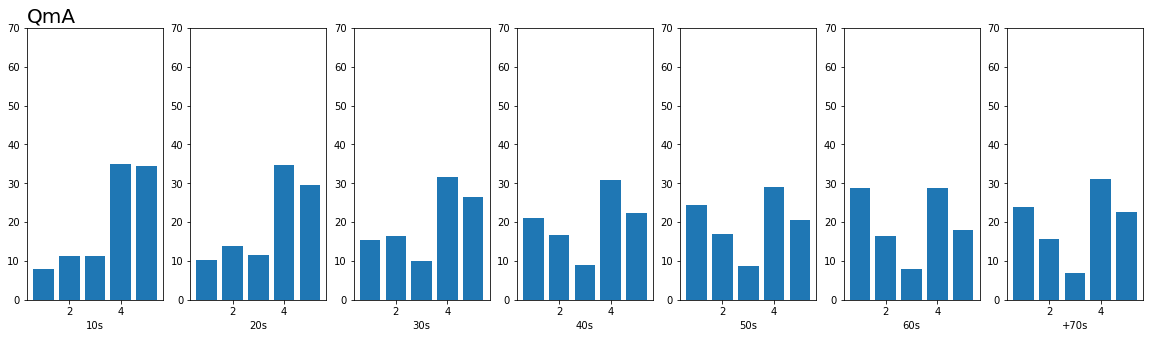

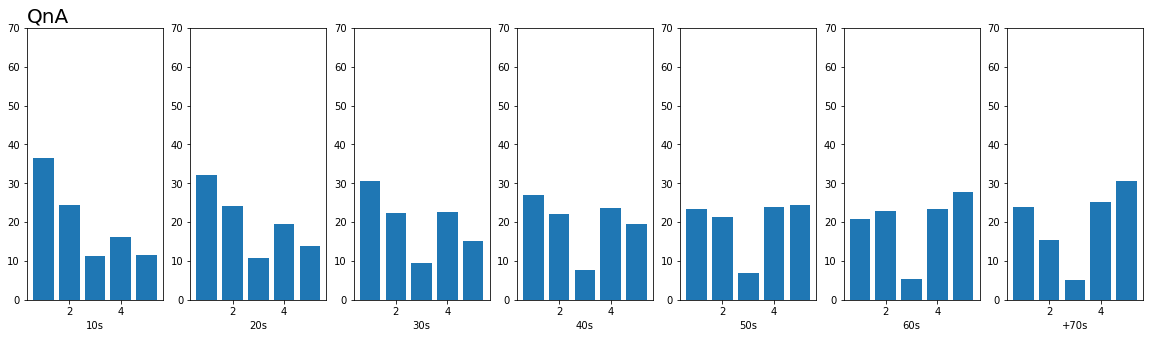

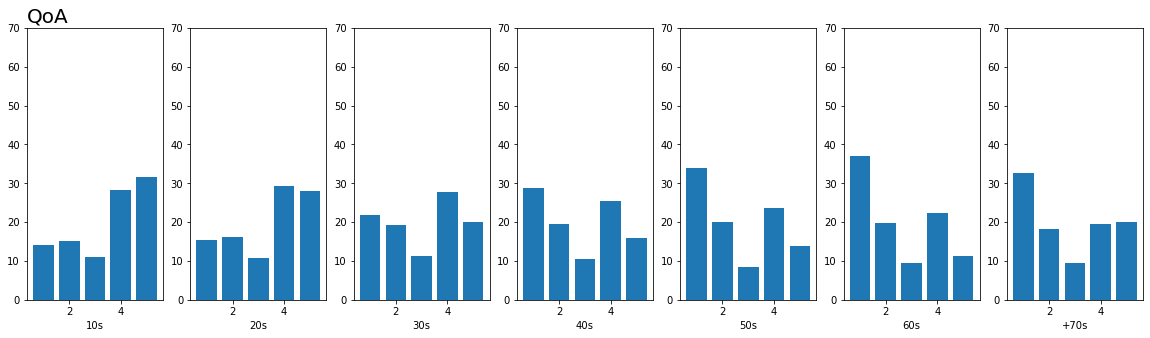

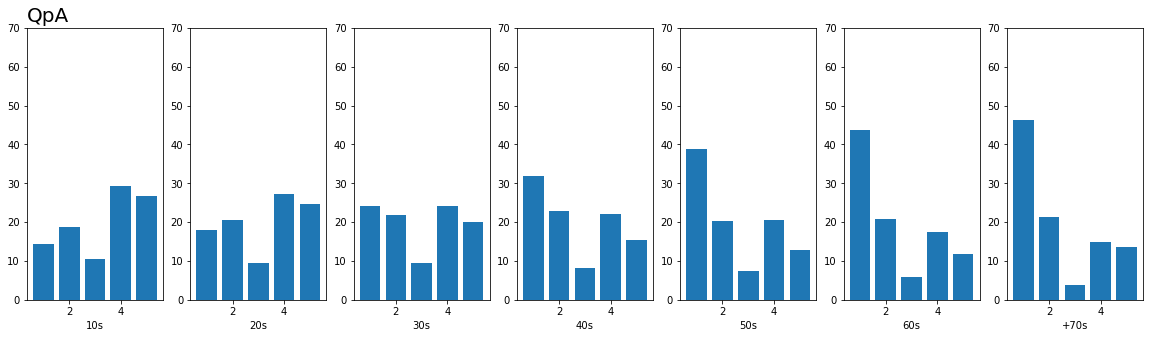

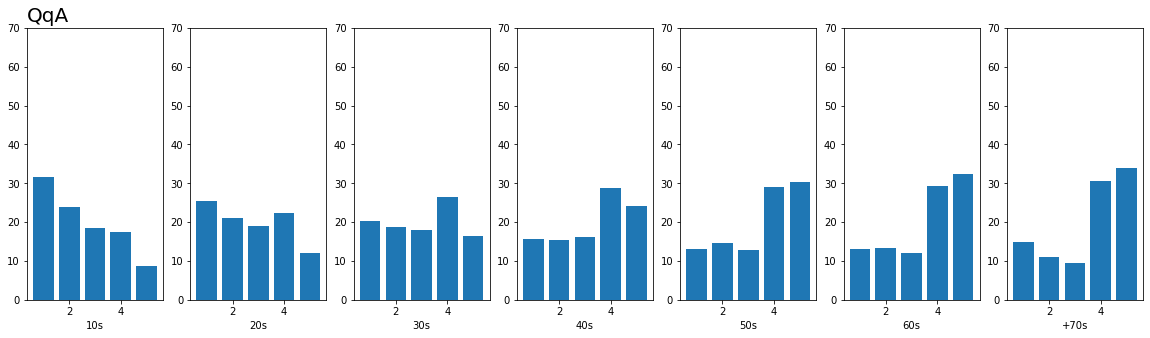

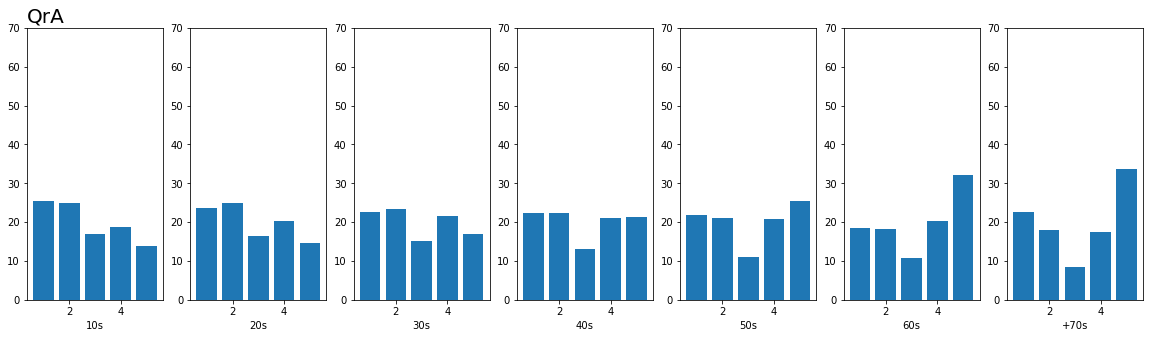

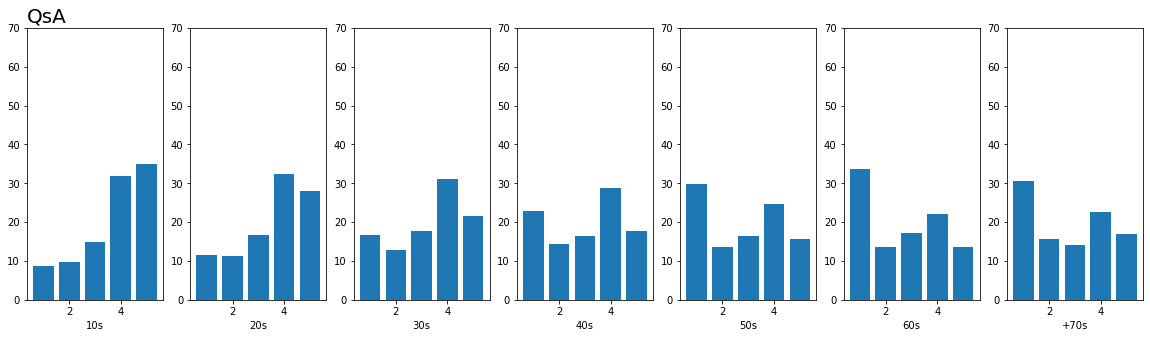

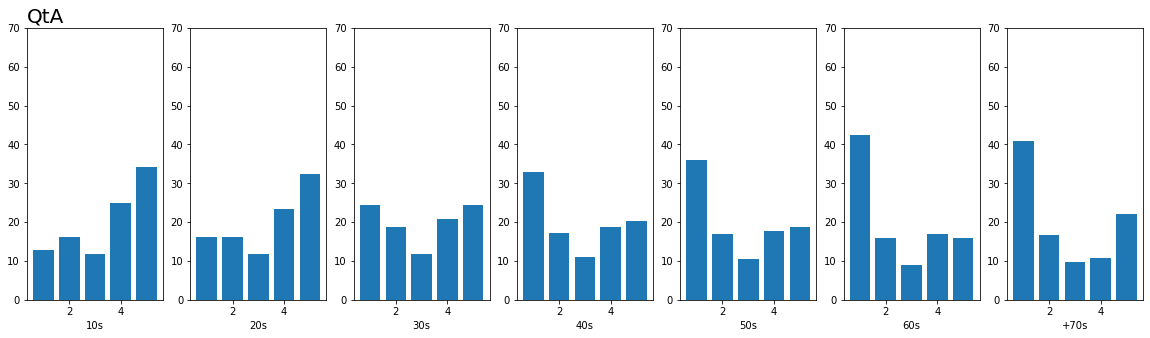

In [51]:
for i in questiontype.columns:
    question_age_distribution(i)

In [52]:
def question_age_average(question):    
    #연령대별 답변 평균
    pivot1=pd.pivot_table(data=df,values=str(question),index='age_group',aggfunc=np.mean)
    pivot1.index=ordered
    print('%s 연령별 응답 평균' %question)
    display(pivot1)
    
    #연령대별 평균 그래프
    plt.figure(figsize=(5,4))
    sns.barplot(x='age_group',y=question,data=df,order=ordered)
    plt.ylim(0,5)

QaA 연령별 응답 평균


,QaA
10s,2.297872
20s,2.080127
30s,2.038478
40s,2.095712
50s,2.304494
60s,2.424022
+70s,2.530151


QbA 연령별 응답 평균


,QbA
10s,2.365957
20s,3.313542
30s,2.948271
40s,2.680832
50s,2.502475
60s,2.350640
+70s,2.130653


QcA 연령별 응답 평균


,QcA
10s,3.429787
20s,3.709251
30s,3.757653
40s,3.634252
50s,3.503861
60s,3.453444
+70s,3.383585


QdA 연령별 응답 평균


,QdA
10s,2.004255
20s,1.743299
30s,1.704294
40s,1.695763
50s,1.810929
60s,1.889927
+70s,2.044389


QeA 연령별 응답 평균


,QeA
10s,2.770213
20s,2.318044
30s,2.291808
40s,2.252169
50s,2.338547
60s,2.447560
+70s,2.567839


QfA 연령별 응답 평균


,QfA
10s,2.663830
20s,2.009145
30s,2.099135
40s,2.201889
50s,2.396357
60s,2.554863
+70s,2.656616


QgA 연령별 응답 평균


,QgA
10s,2.442553
20s,2.491171
30s,2.518495
40s,2.589842
50s,2.698476
60s,2.745933
+70s,2.684255


QhA 연령별 응답 평균


,QhA
10s,2.327660
20s,2.435385
30s,2.376063
40s,2.248469
50s,2.093843
60s,2.111457
+70s,2.134841


QiA 연령별 응답 평균


,QiA
10s,3.770213
20s,2.951741
30s,3.023172
40s,3.242215
50s,3.469016
60s,3.690204
+70s,3.918760


QjA 연령별 응답 평균


,QjA
10s,2.804255
20s,3.758424
30s,3.701460
40s,3.521312
50s,3.297169
60s,3.060575
+70s,2.840871


QkA 연령별 응답 평균


,QkA
10s,4.285106
20s,3.502638
30s,3.718750
40s,3.979837
50s,4.215997
60s,4.368294
+70s,4.421273


QlA 연령별 응답 평균


,QlA
10s,4.102128
20s,4.385227
30s,4.363733
40s,4.354900
50s,4.235399
60s,4.053306
+70s,4.061977


QmA 연령별 응답 평균


,QmA
10s,3.127660
20s,3.769469
30s,3.600198
40s,3.373788
50s,3.164720
60s,3.041537
+70s,2.903685


QnA 연령별 응답 평균


,QnA
10s,3.234043
20s,2.421597
30s,2.589853
40s,2.692828
50s,2.868145
60s,3.048806
+70s,3.144054


QoA 연령별 응답 평균


,QoA
10s,2.757447
20s,3.478931
30s,3.383291
40s,3.046835
50s,2.804593
60s,2.633091
+70s,2.506700


QpA 연령별 응답 평균


,QpA
10s,2.280851
20s,3.355470
30s,3.203586
40s,2.936575
50s,2.662839
60s,2.484943
+70s,2.328308


QqA 연령별 응답 평균


,QqA
10s,3.578723
20s,2.477172
30s,2.747520
40s,3.001404
50s,3.302316
60s,3.487366
+70s,3.543551


QrA 연령별 응답 평균


,QrA
10s,3.217021
20s,2.704960
30s,2.770975
40s,2.867407
50s,2.964561
60s,3.071651
+70s,3.292295


QsA 연령별 응답 평균


,QsA
10s,2.795745
20s,3.747520
30s,3.540108
40s,3.277565
50s,3.041972
60s,2.829699
+70s,2.680067


QtA 연령별 응답 평균


,QtA
10s,2.565957
20s,3.519029
30s,3.396967
40s,3.024758
50s,2.760443
60s,2.667013
+70s,2.477387


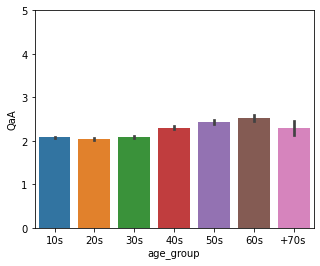

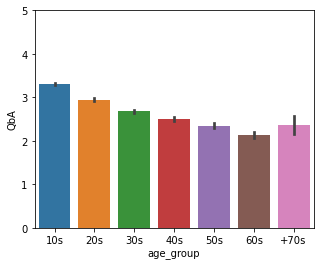

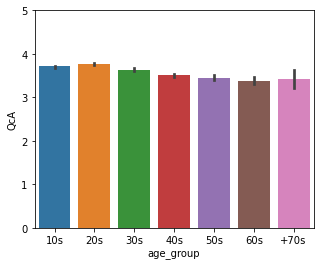

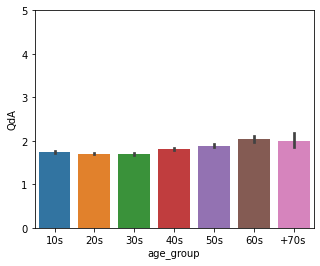

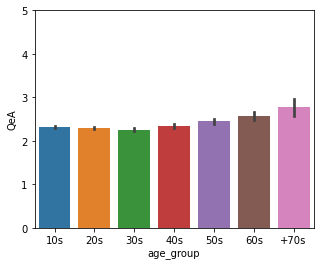

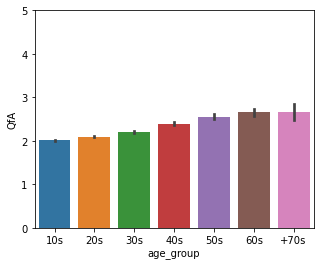

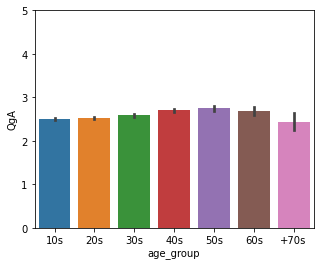

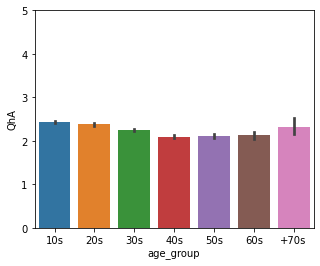

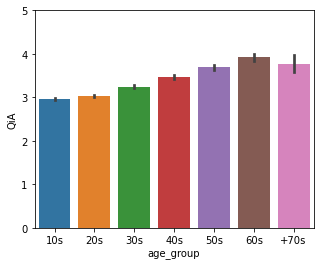

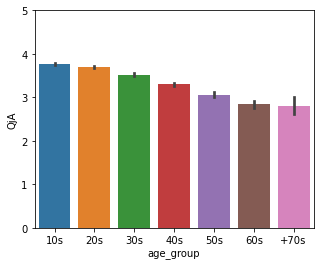

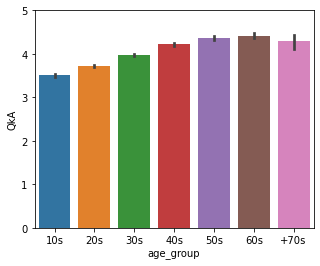

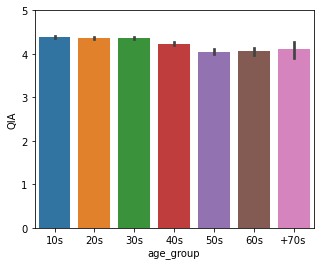

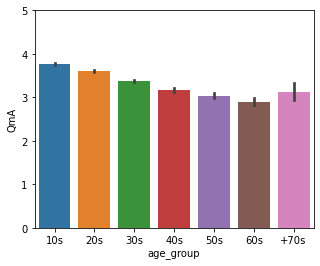

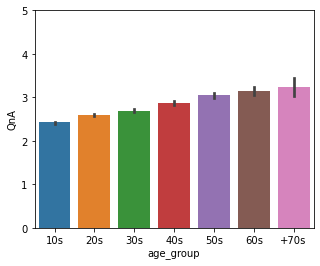

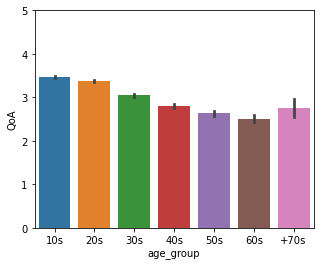

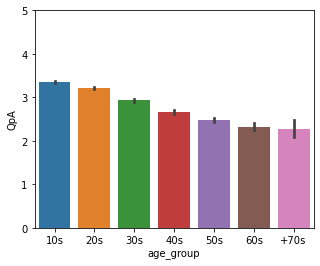

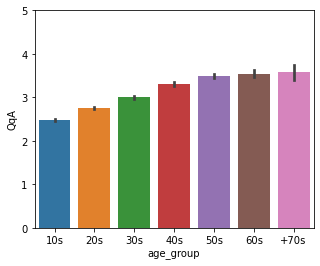

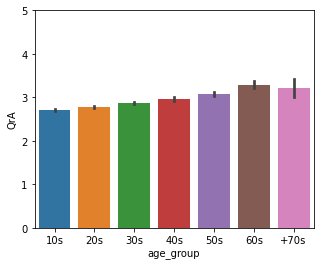

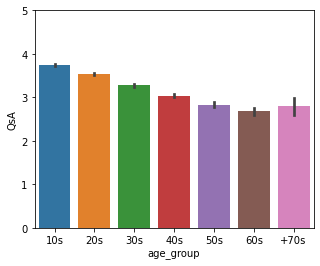

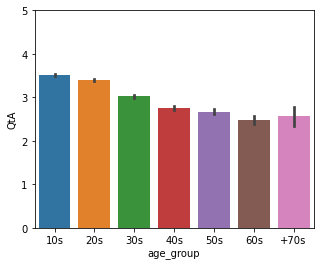

In [53]:
for i in questiontype.columns:
    question_age_average(i)

In [54]:
#연령대 숫자로 바꾸는 작업하고 correlation heatmap 그리기
def string_to_num(string):
    if string=='10s': return 10
    if string=='20s': return 20
    if string=='30s': return 30
    if string=='40s': return 40
    if string=='50s': return 50
    if string=='60s': return 60
    if string=='+70s': return 70

<AxesSubplot:>

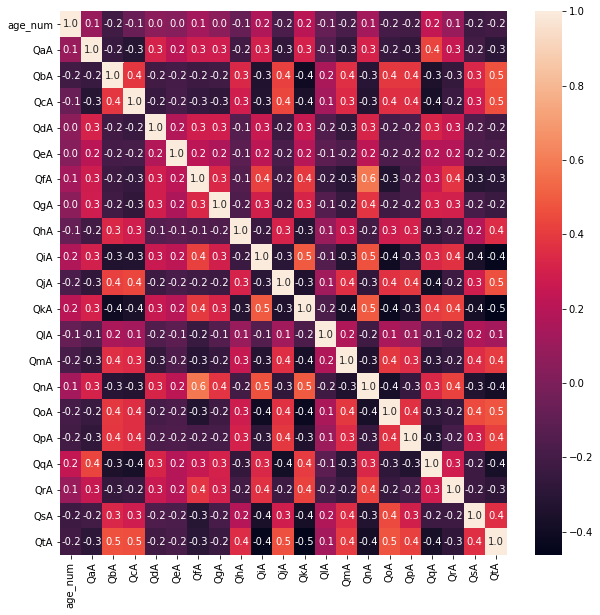

In [55]:
df['age_num']=df['age_group'].apply(lambda x:string_to_num(x))
plt.figure(figsize=(10,10))
sns.heatmap(df.loc[:,['age_num','QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA','QkA','QlA','QmA','QnA','QoA',
                      'QpA','QqA','QrA','QsA','QtA']].corr(),annot=True,fmt='.1f')

### 3. 연령대-응답시간

In [73]:
QE_columns=list(df.loc[:,df.columns[2:41:2]].columns)
df_QE=df.loc[:,QE_columns]
df_QE.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,4.068434e+03,2.576363e+03,2.038986e+03,3.741018e+03,2.050287e+03,959.880502,1.435762e+03,1.633479e+03,1.154352e+03,2.470808e+03,1.164117e+03,2.240057e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,1.141738e+05,5.411432e+04,3.069164e+04,3.663672e+05,7.530787e+04,5869.964127,1.084997e+04,2.600221e+04,2.250689e+04,1.482890e+05,7.433515e+03,6.730924e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,1.259000e+03,9.020000e+02,8.590000e+02,8.060000e+02,6.500000e+02,428.000000,6.380000e+02,7.060000e+02,4.610000e+02,7.940000e+02,5.270000e+02,7.330000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,1.800000e+03,1.260000e+03,1.178000e+03,1.125000e+03,9.060000e+02,596.000000,8.830000e+02,9.700000e+02,6.520000e+02,1.117000e+03,7.470000e+02,1.020000e+03
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,2.761000e+03,1.899000e+03,1.721000e+03,1.649000e+03,1.342000e+03,891.000000,1.300000e+03,1.409000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.703586e+07,9.910006e+06,4.824953e+06,7.754351e+07,1.410832e+07,606694.000000,1.309739e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


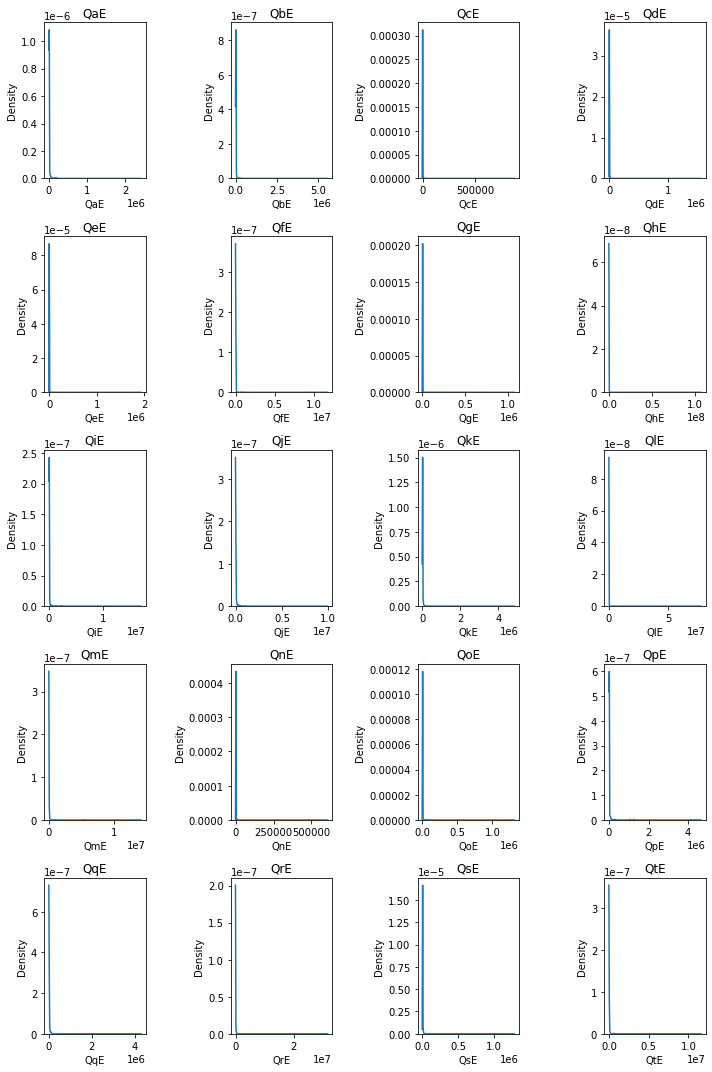

In [74]:
fig,ax=plt.subplots(5,4,figsize=(10,15))
for i in range(20):
    x_num=i//4
    y_num=i%4
    ax[x_num,y_num]=sns.kdeplot(df_QE.iloc[:,i],ax=ax[x_num][y_num])
    ax[x_num,y_num].set_title(df_QE.columns[i])
plt.tight_layout()
plt.show()

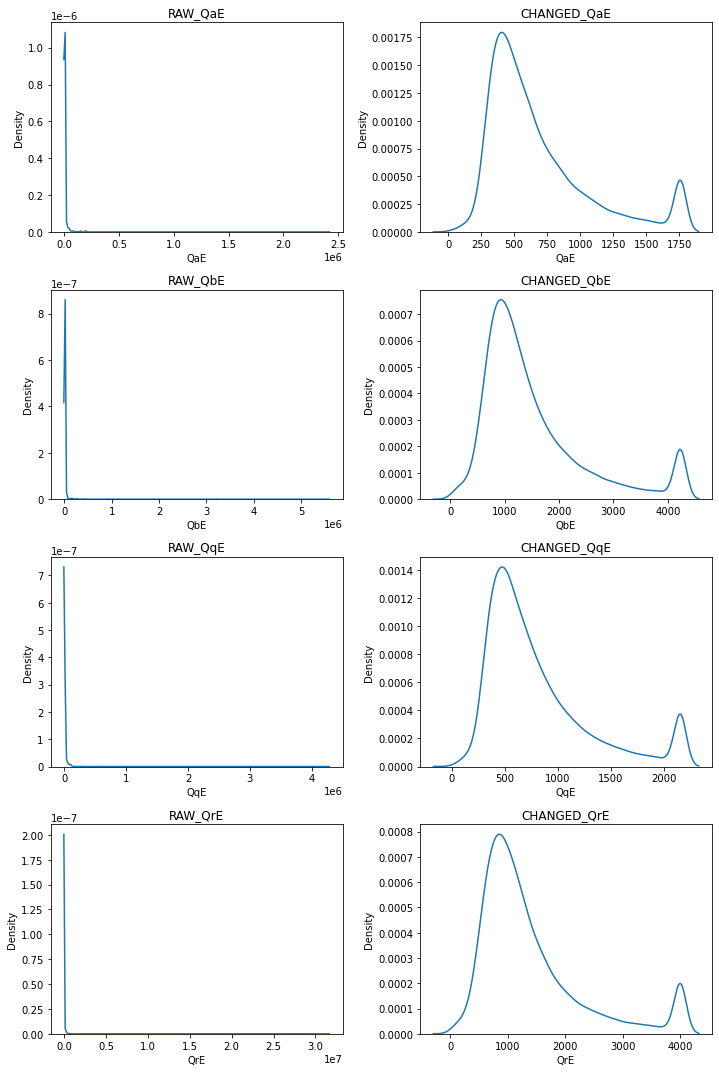

In [75]:
outlier_columns = ['QaE','QbE','QqE','QrE']
fig,ax = plt.subplots(4,2, figsize=(10,15))
changed_df_QE = df_QE.loc[:,outlier_columns].apply(lambda x: x.clip(x.quantile(.00), x.quantile(.95)), axis=0)
for i in range(8):
    x_num = i//2
    y_num = i%2
    column = outlier_columns[i//2]
    if i %2 == 0:
        ax[x_num,y_num] = sns.kdeplot(df_QE.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('RAW_'+column)
    else:
        
        ax[x_num,y_num] = sns.kdeplot(changed_df_QE.loc[:,column], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('CHANGED_'+column)
plt.tight_layout()
plt.show()

df_QE.loc[:,outlier_columns] = changed_df_QE

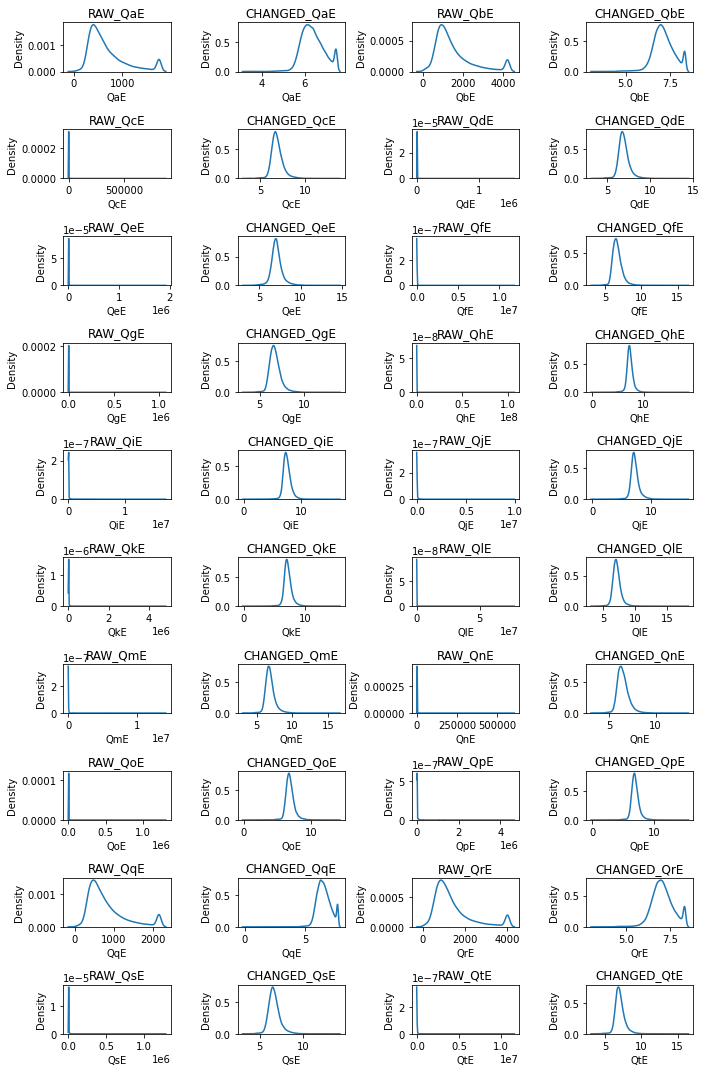

In [76]:
fig,ax = plt.subplots(10,4, figsize=(10,15))
changed_df_QE = np.log1p(df_QE)
columns = df_QE.columns
for i in range(40):
    column = columns[i//2]
    x_num = i // 4
    y_num = i % 4
    
    if i % 2 == 0:
        ax[x_num,y_num] = sns.kdeplot(df_QE.iloc[:,i//2], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('RAW_'+column)
    else:
        ax[x_num,y_num] = sns.kdeplot(changed_df_QE.iloc[:,i//2], ax = ax[x_num][y_num])
        ax[x_num,y_num].set_title('CHANGED_'+column)
plt.tight_layout()
plt.show()

df_QE.loc[:,columns] = changed_df_QE

In [89]:
age_QE=pd.DataFrame(df['age_group']).join(df_QE)
age_QE.head()

,age_group,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,...,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,30s,5.897154,7.223296,6.905753,6.932448,7.363914,6.291569,6.375025,6.999422,7.041412,...,6.784457,6.747587,6.747587,6.705639,6.363028,6.829794,5.905362,6.776507,6.452049,7.017506
1,20s,6.473891,7.180831,8.127995,7.996317,8.371242,7.692113,6.717805,8.314587,7.532624,...,7.987524,8.275886,8.373323,7.511525,7.102499,7.789455,7.213032,8.019613,8.367532,7.205635
2,30s,7.392648,7.300473,6.929517,8.124151,7.195937,6.276643,7.063048,6.924612,7.883823,...,6.906755,7.843064,6.823286,7.675082,7.173958,7.031741,6.843750,7.191429,7.065613,7.251345
3,20s,6.224558,7.745868,6.900731,8.085179,5.880533,7.326466,5.075174,7.730175,7.940940,...,8.077137,7.167809,9.110188,7.104144,7.064759,10.080336,6.366470,8.295910,7.780303,7.180070
4,20s,6.833032,6.562444,6.322565,6.968850,6.922644,6.444131,6.899723,7.138867,7.050989,...,6.608001,7.074963,6.306275,6.356108,6.626718,7.039660,5.780744,6.976348,6.369901,7.544332


<AxesSubplot:xlabel='age_group', ylabel='QaE'>

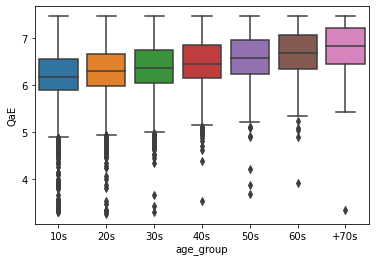

In [96]:
sns.boxplot(x='age_group',y='QaE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QbE'>

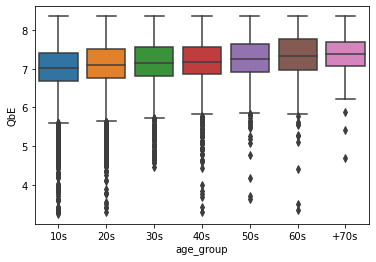

In [97]:
sns.boxplot(x='age_group',y='QbE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QcE'>

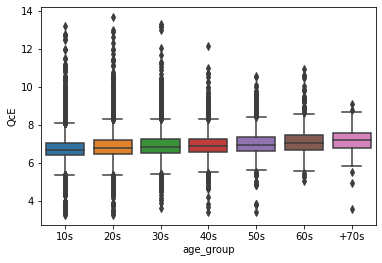

In [98]:
sns.boxplot(x='age_group',y='QcE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QdE'>

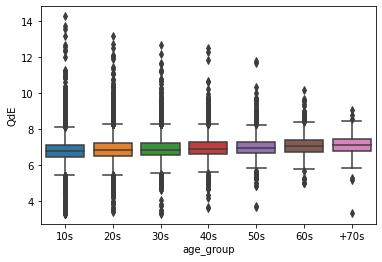

In [99]:
sns.boxplot(x='age_group',y='QdE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QeE'>

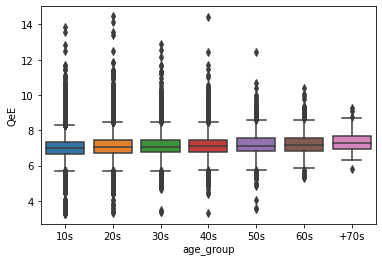

In [100]:
sns.boxplot(x='age_group',y='QeE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QfE'>

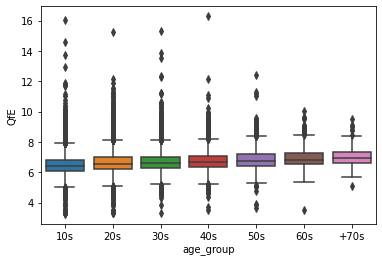

In [101]:
sns.boxplot(x='age_group',y='QfE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QgE'>

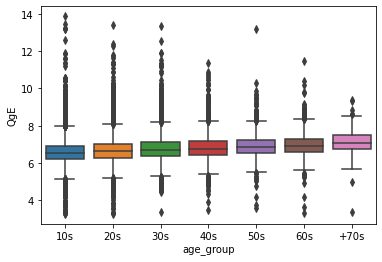

In [102]:
sns.boxplot(x='age_group',y='QgE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QhE'>

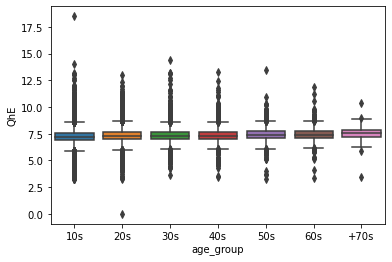

In [103]:
sns.boxplot(x='age_group',y='QhE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QiE'>

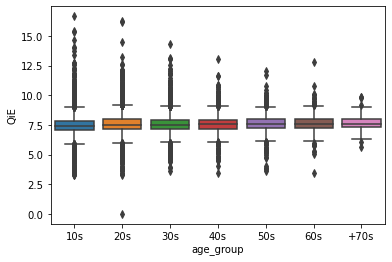

In [104]:
sns.boxplot(x='age_group',y='QiE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QjE'>

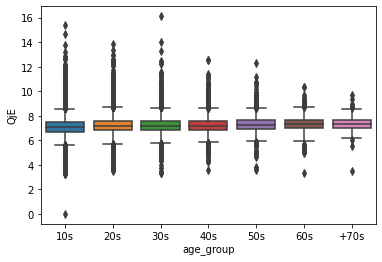

In [105]:
sns.boxplot(x='age_group',y='QjE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QkE'>

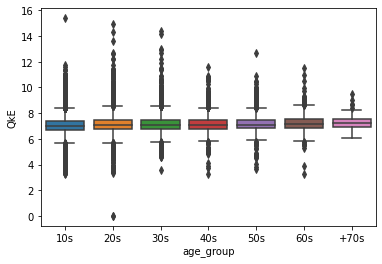

In [106]:
sns.boxplot(x='age_group',y='QkE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QlE'>

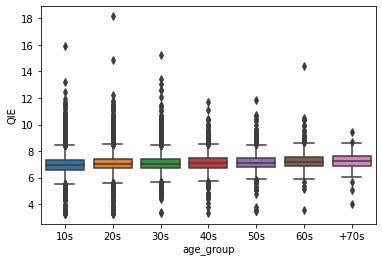

In [107]:
sns.boxplot(x='age_group',y='QlE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QmE'>

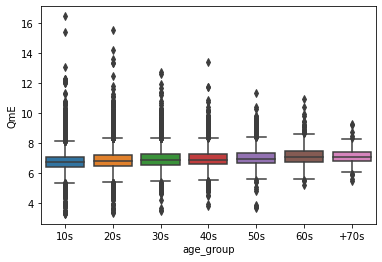

In [108]:
sns.boxplot(x='age_group',y='QmE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QnE'>

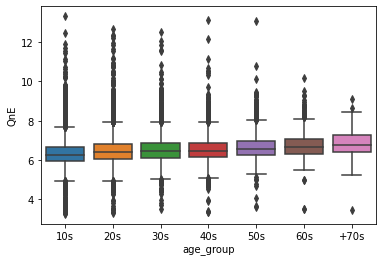

In [109]:
sns.boxplot(x='age_group',y='QnE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QoE'>

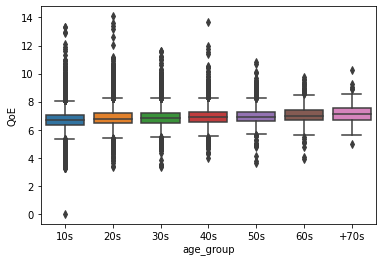

In [110]:
sns.boxplot(x='age_group',y='QoE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QpE'>

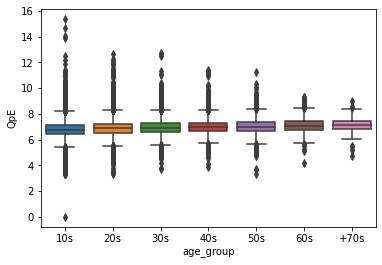

In [111]:
sns.boxplot(x='age_group',y='QpE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QqE'>

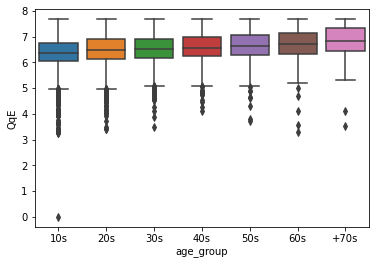

In [112]:
sns.boxplot(x='age_group',y='QqE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QrE'>

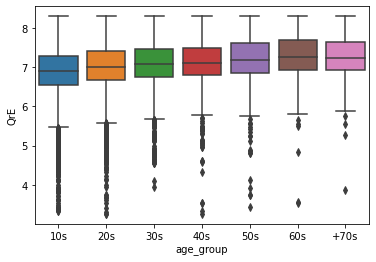

In [113]:
sns.boxplot(x='age_group',y='QrE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QsE'>

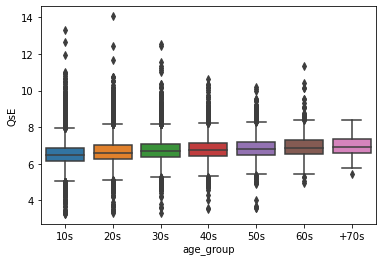

In [114]:
sns.boxplot(x='age_group',y='QsE',data=age_QE,order=ordered)

<AxesSubplot:xlabel='age_group', ylabel='QtE'>

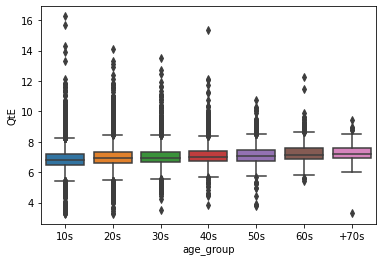

In [115]:
sns.boxplot(x='age_group',y='QtE',data=age_QE,order=ordered)

### 4. 연령대-성격특성 질문
- 연령대 높아질수록 친화성, 성실성, 정서적 안정성이 높게 나타난다.
- 외향성, 경험개방성 등은 연령에 따라 큰 차이가 없다. 

In [56]:
#7에 가까울수록 agree strongly, 0이 무응답으로 변환
df['tp01']=7-df['tp01']
df['tp02']=7-df['tp02']
df['tp03']=7-df['tp03']
df['tp04']=7-df['tp04']
df['tp05']=7-df['tp05']
df['tp06']=7-df['tp06']
df['tp07']=7-df['tp07']
df['tp08']=7-df['tp08']
df['tp09']=7-df['tp09']
df['tp10']=7-df['tp10']

In [57]:
def personality_age_distribution(question):
    df_1=df[df[question]!=0] #결측치 제거
    ordered_includeall=['10s','20s','30s','40s','50s','60s','+70s','All']
    pivot2=pd.pivot_table(df_1,values='index',index=question,columns='age_group',aggfunc='count',margins=True)
    pivot2=pivot2.reindex(ordered_includeall,axis=1)
    print('%s 연령대별 응답 총개수' %question)
    display(pivot2)
    
    pivot3=(pivot2/pivot2.loc['All'])*100
    print('%s 연령대별 응답 비율' %question)
    display(round(pivot3,1))  

    pivot3.reset_index(inplace=True)
    fig,axes=plt.subplots(nrows=1,ncols=7,figsize=(20,5))
    axes[0].bar(pivot3[question].tolist()[0:7],pivot3['10s'].tolist()[0:7])
    axes[1].bar(pivot3[question].tolist()[0:7],pivot3['20s'].tolist()[0:7])
    axes[2].bar(pivot3[question].tolist()[0:7],pivot3['30s'].tolist()[0:7])
    axes[3].bar(pivot3[question].tolist()[0:7],pivot3['40s'].tolist()[0:7])
    axes[4].bar(pivot3[question].tolist()[0:7],pivot3['50s'].tolist()[0:7])
    axes[5].bar(pivot3[question].tolist()[0:7],pivot3['60s'].tolist()[0:7])
    axes[6].bar(pivot3[question].tolist()[0:7],pivot3['+70s'].tolist()[0:7])

    axes[0].set_xlabel('10s')
    axes[1].set_xlabel('20s')
    axes[2].set_xlabel('30s')
    axes[3].set_xlabel('40s')
    axes[4].set_xlabel('50s')
    axes[5].set_xlabel('60s')
    axes[6].set_xlabel('+70s')


    axes[0].set_yticks(np.arange(0,55,5))
    axes[1].set_yticks(np.arange(0,55,5))
    axes[2].set_yticks(np.arange(0,55,5))
    axes[3].set_yticks(np.arange(0,55,5))
    axes[4].set_yticks(np.arange(0,55,5))
    axes[5].set_yticks(np.arange(0,55,5))
    axes[6].set_yticks(np.arange(0,55,5))   

    axes[0].set_title(question,loc='left',fontsize=20)

tp01 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp01,,,,,,,,
1,1896,1901,1095,673,312,145,19,6041
2,2478,2539,1392,820,476,198,39,7942
3,1861,1935,1045,583,316,144,16,5900
4,1155,1136,687,400,223,76,15,3692
5,2504,2436,1332,908,456,206,35,7877
6,2771,2699,1455,1087,701,252,49,9014
7,1496,1422,797,531,363,132,42,4783
All,14161,14068,7803,5002,2847,1153,215,45249


tp01 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp01,,,,,,,,
1,13.4,13.5,14.0,13.5,11.0,12.6,8.8,13.4
2,17.5,18.0,17.8,16.4,16.7,17.2,18.1,17.6
3,13.1,13.8,13.4,11.7,11.1,12.5,7.4,13.0
4,8.2,8.1,8.8,8.0,7.8,6.6,7.0,8.2
5,17.7,17.3,17.1,18.2,16.0,17.9,16.3,17.4
6,19.6,19.2,18.6,21.7,24.6,21.9,22.8,19.9
7,10.6,10.1,10.2,10.6,12.8,11.4,19.5,10.6
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp02 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp02,,,,,,,,
1,814,1154,901,756,611,320,58,4614
2,1250,1460,988,849,531,216,46,5340
3,1231,1230,794,515,296,113,19,4198
4,1472,1170,637,369,187,73,13,3921
5,3963,3925,2179,1386,740,259,46,12498
6,3223,3194,1486,798,348,133,26,9208
7,2188,1923,821,330,131,39,6,5438
All,14141,14056,7806,5003,2844,1153,214,45217


tp02 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp02,,,,,,,,
1,5.8,8.2,11.5,15.1,21.5,27.8,27.1,10.2
2,8.8,10.4,12.7,17.0,18.7,18.7,21.5,11.8
3,8.7,8.8,10.2,10.3,10.4,9.8,8.9,9.3
4,10.4,8.3,8.2,7.4,6.6,6.3,6.1,8.7
5,28.0,27.9,27.9,27.7,26.0,22.5,21.5,27.6
6,22.8,22.7,19.0,16.0,12.2,11.5,12.1,20.4
7,15.5,13.7,10.5,6.6,4.6,3.4,2.8,12.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp03 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp03,,,,,,,,
1,475,465,203,74,47,21,3,1288
2,884,885,395,209,97,42,3,2515
3,1456,1349,658,368,154,56,12,4053
4,1256,1184,562,281,137,51,12,3483
5,3017,2929,1512,831,353,122,13,8777
6,3900,4000,2442,1702,979,395,70,13488
7,3118,3222,2020,1541,1084,472,110,11567
All,14106,14034,7792,5006,2851,1159,223,45171


tp03 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp03,,,,,,,,
1,3.4,3.3,2.6,1.5,1.6,1.8,1.3,2.9
2,6.3,6.3,5.1,4.2,3.4,3.6,1.3,5.6
3,10.3,9.6,8.4,7.4,5.4,4.8,5.4,9.0
4,8.9,8.4,7.2,5.6,4.8,4.4,5.4,7.7
5,21.4,20.9,19.4,16.6,12.4,10.5,5.8,19.4
6,27.6,28.5,31.3,34.0,34.3,34.1,31.4,29.9
7,22.1,23.0,25.9,30.8,38.0,40.7,49.3,25.6
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp04 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp04,,,,,,,,
1,2053,2030,1197,850,598,289,61,7078
2,2056,2036,1299,977,602,264,43,7277
3,1490,1435,844,576,286,101,22,4754
4,1109,1182,681,412,236,80,10,3710
5,3060,3243,1867,1135,617,218,49,10189
6,2271,2291,1063,649,322,138,18,6752
7,2094,1838,842,402,185,65,11,5437
All,14133,14055,7793,5001,2846,1155,214,45197


tp04 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp04,,,,,,,,
1,14.5,14.4,15.4,17.0,21.0,25.0,28.5,15.7
2,14.5,14.5,16.7,19.5,21.2,22.9,20.1,16.1
3,10.5,10.2,10.8,11.5,10.0,8.7,10.3,10.5
4,7.8,8.4,8.7,8.2,8.3,6.9,4.7,8.2
5,21.7,23.1,24.0,22.7,21.7,18.9,22.9,22.5
6,16.1,16.3,13.6,13.0,11.3,11.9,8.4,14.9
7,14.8,13.1,10.8,8.0,6.5,5.6,5.1,12.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp05 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp05,,,,,,,,
1,195,149,66,43,36,15,3,507
2,423,325,216,144,85,44,6,1243
3,901,732,407,275,131,54,13,2513
4,1031,802,440,253,138,68,18,2750
5,2974,2804,1494,877,451,159,16,8775
6,3997,4150,2395,1627,1024,414,74,13681
7,4626,5099,2788,1784,980,406,89,15772
All,14147,14061,7806,5003,2845,1160,219,45241


tp05 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp05,,,,,,,,
1,1.4,1.1,0.8,0.9,1.3,1.3,1.4,1.1
2,3.0,2.3,2.8,2.9,3.0,3.8,2.7,2.7
3,6.4,5.2,5.2,5.5,4.6,4.7,5.9,5.6
4,7.3,5.7,5.6,5.1,4.9,5.9,8.2,6.1
5,21.0,19.9,19.1,17.5,15.9,13.7,7.3,19.4
6,28.3,29.5,30.7,32.5,36.0,35.7,33.8,30.2
7,32.7,36.3,35.7,35.7,34.4,35.0,40.6,34.9
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp06 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp06,,,,,,,,
1,1335,1287,873,653,414,142,32,4736
2,1353,1267,854,637,376,152,25,4664
3,1366,1455,901,575,313,97,7,4714
4,1283,1269,739,453,250,107,25,4126
5,2961,2961,1662,1033,548,240,40,9445
6,2747,2722,1436,888,553,238,56,8640
7,3098,3094,1339,772,392,184,33,8912
All,14143,14055,7804,5011,2846,1160,218,45237


tp06 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp06,,,,,,,,
1,9.4,9.2,11.2,13.0,14.5,12.2,14.7,10.5
2,9.6,9.0,10.9,12.7,13.2,13.1,11.5,10.3
3,9.7,10.4,11.5,11.5,11.0,8.4,3.2,10.4
4,9.1,9.0,9.5,9.0,8.8,9.2,11.5,9.1
5,20.9,21.1,21.3,20.6,19.3,20.7,18.3,20.9
6,19.4,19.4,18.4,17.7,19.4,20.5,25.7,19.1
7,21.9,22.0,17.2,15.4,13.8,15.9,15.1,19.7
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp07 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp07,,,,,,,,
1,1129,754,262,114,61,20,5,2345
2,1296,993,469,229,92,40,10,3129
3,1505,1258,621,346,156,71,11,3968
4,1520,1446,735,375,192,63,8,4339
5,3230,3306,1700,985,463,194,36,9914
6,3108,3605,2128,1498,904,379,67,11689
7,2349,2687,1882,1451,977,385,80,9811
All,14137,14049,7797,4998,2845,1152,217,45195


tp07 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp07,,,,,,,,
1,8.0,5.4,3.4,2.3,2.1,1.7,2.3,5.2
2,9.2,7.1,6.0,4.6,3.2,3.5,4.6,6.9
3,10.6,9.0,8.0,6.9,5.5,6.2,5.1,8.8
4,10.8,10.3,9.4,7.5,6.7,5.5,3.7,9.6
5,22.8,23.5,21.8,19.7,16.3,16.8,16.6,21.9
6,22.0,25.7,27.3,30.0,31.8,32.9,30.9,25.9
7,16.6,19.1,24.1,29.0,34.3,33.4,36.9,21.7
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp08 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp08,,,,,,,,
1,2210,2735,1850,1425,930,407,94,9651
2,2111,2376,1475,1058,622,263,34,7939
3,1892,1830,1033,576,293,97,9,5730
4,1303,1317,695,371,188,76,15,3965
5,3279,3104,1644,1032,495,203,43,9800
6,1904,1613,672,384,200,71,17,4861
7,1418,1058,409,149,110,36,4,3184
All,14117,14033,7778,4995,2838,1153,216,45130


tp08 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp08,,,,,,,,
1,15.7,19.5,23.8,28.5,32.8,35.3,43.5,21.4
2,15.0,16.9,19.0,21.2,21.9,22.8,15.7,17.6
3,13.4,13.0,13.3,11.5,10.3,8.4,4.2,12.7
4,9.2,9.4,8.9,7.4,6.6,6.6,6.9,8.8
5,23.2,22.1,21.1,20.7,17.4,17.6,19.9,21.7
6,13.5,11.5,8.6,7.7,7.0,6.2,7.9,10.8
7,10.0,7.5,5.3,3.0,3.9,3.1,1.9,7.1
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp09 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp09,,,,,,,,
1,1112,760,366,171,84,25,3,2521
2,1410,1282,618,382,164,57,13,3926
3,2143,2024,1086,615,335,108,17,6328
4,1634,1668,891,513,237,86,15,5044
5,2354,2533,1465,903,420,174,20,7869
6,2824,3182,1916,1421,948,390,78,10759
7,2673,2618,1457,1000,658,322,71,8799
All,14150,14067,7799,5005,2846,1162,217,45246


tp09 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp09,,,,,,,,
1,7.9,5.4,4.7,3.4,3.0,2.2,1.4,5.6
2,10.0,9.1,7.9,7.6,5.8,4.9,6.0,8.7
3,15.1,14.4,13.9,12.3,11.8,9.3,7.8,14.0
4,11.5,11.9,11.4,10.2,8.3,7.4,6.9,11.1
5,16.6,18.0,18.8,18.0,14.8,15.0,9.2,17.4
6,20.0,22.6,24.6,28.4,33.3,33.6,35.9,23.8
7,18.9,18.6,18.7,20.0,23.1,27.7,32.7,19.4
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


tp10 연령대별 응답 총개수


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp10,,,,,,,,
1,4249,4458,2633,1735,1050,402,72,14599
2,3237,3180,1879,1283,757,317,49,10702
3,2310,2267,1190,734,344,146,28,7019
4,1557,1482,758,388,182,86,16,4469
5,1449,1522,724,460,263,91,18,4527
6,748,723,407,264,164,77,21,2404
7,569,414,207,132,79,33,12,1446
All,14119,14046,7798,4996,2839,1152,216,45166


tp10 연령대별 응답 비율


age_group,10s,20s,30s,40s,50s,60s,+70s,All
tp10,,,,,,,,
1,30.1,31.7,33.8,34.7,37.0,34.9,33.3,32.3
2,22.9,22.6,24.1,25.7,26.7,27.5,22.7,23.7
3,16.4,16.1,15.3,14.7,12.1,12.7,13.0,15.5
4,11.0,10.6,9.7,7.8,6.4,7.5,7.4,9.9
5,10.3,10.8,9.3,9.2,9.3,7.9,8.3,10.0
6,5.3,5.1,5.2,5.3,5.8,6.7,9.7,5.3
7,4.0,2.9,2.7,2.6,2.8,2.9,5.6,3.2
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


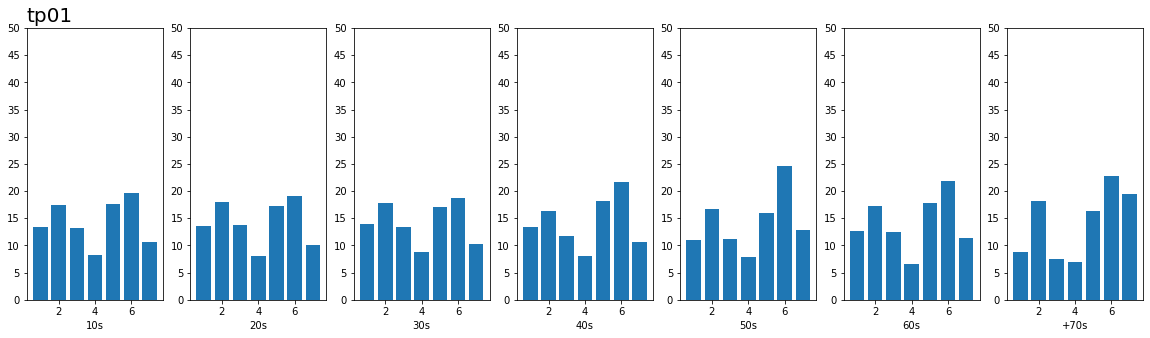

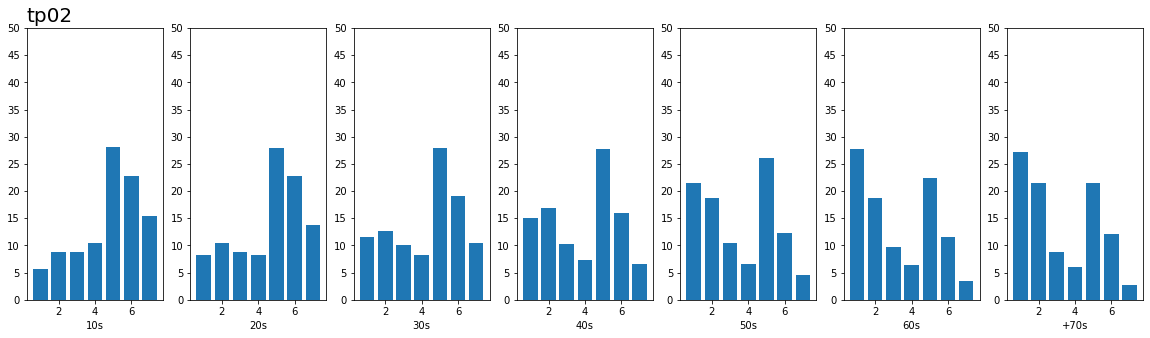

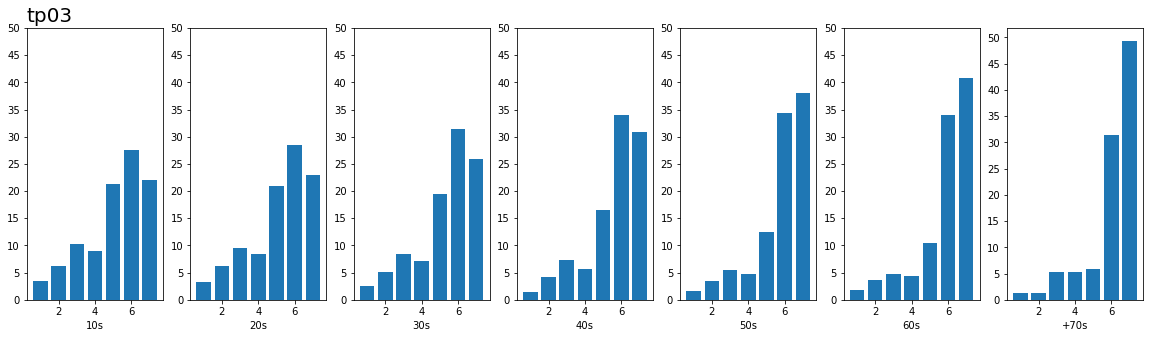

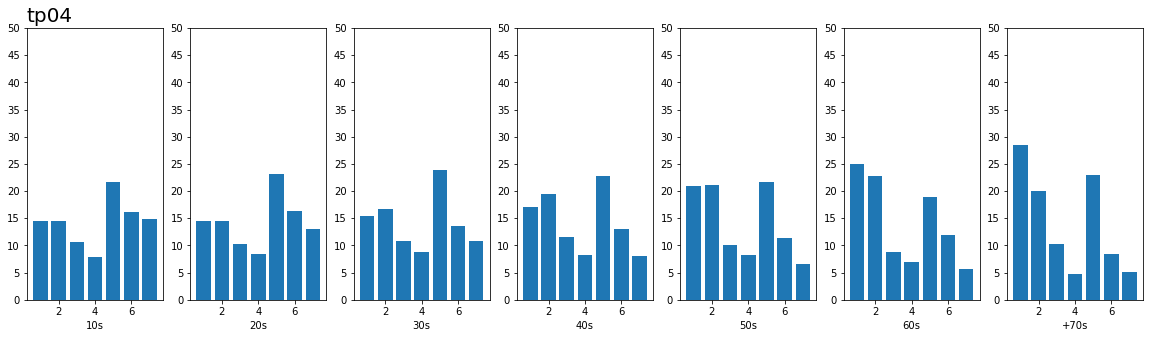

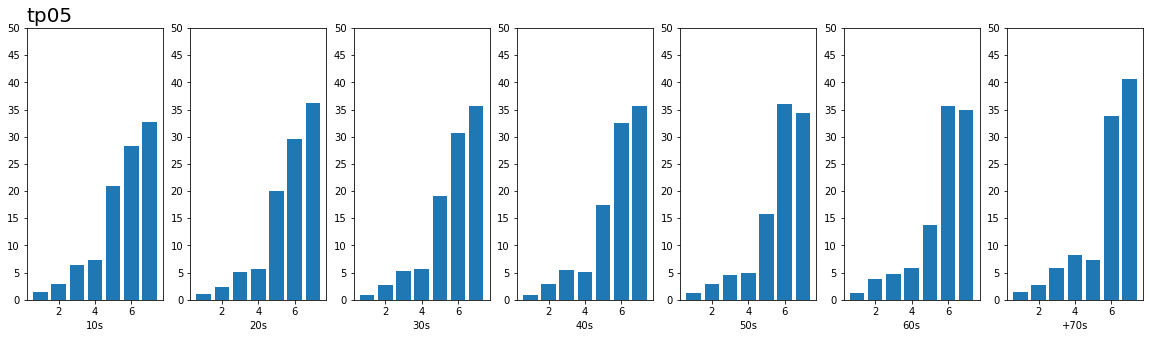

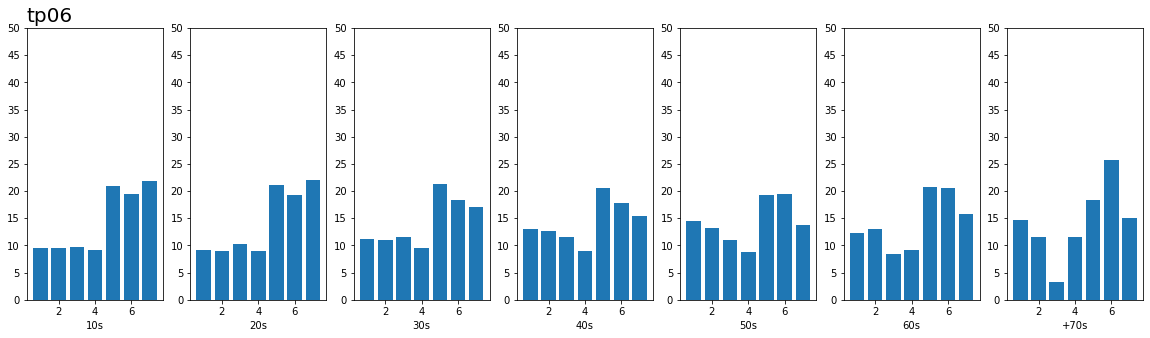

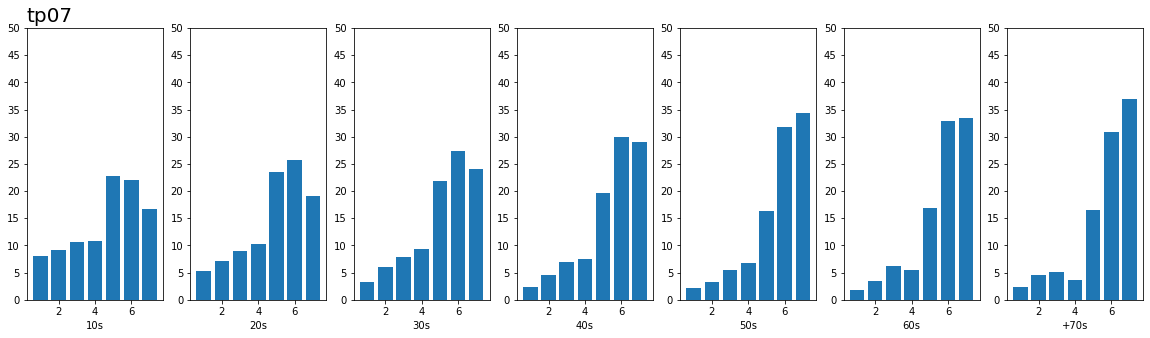

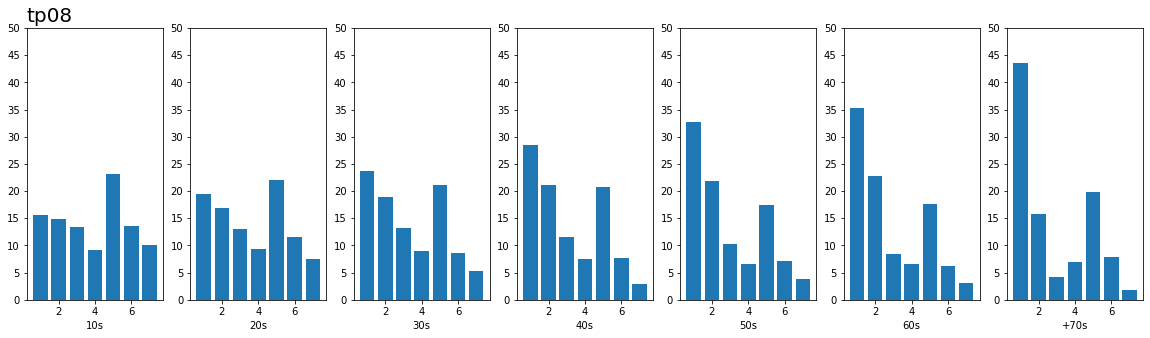

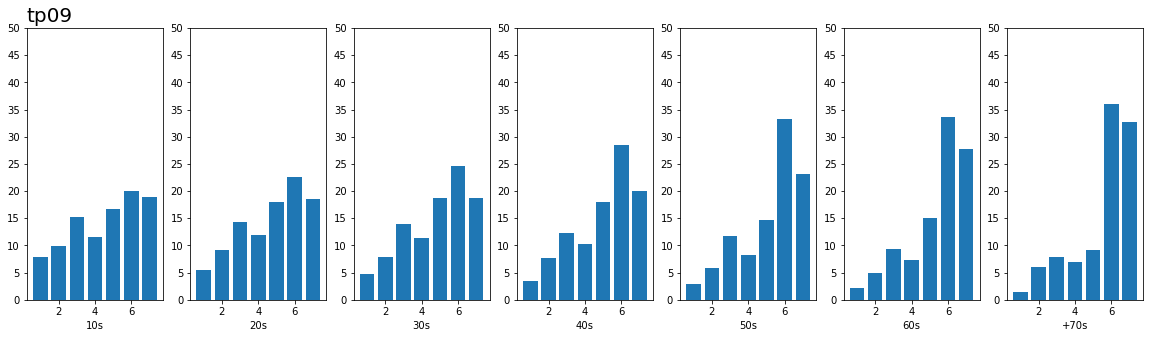

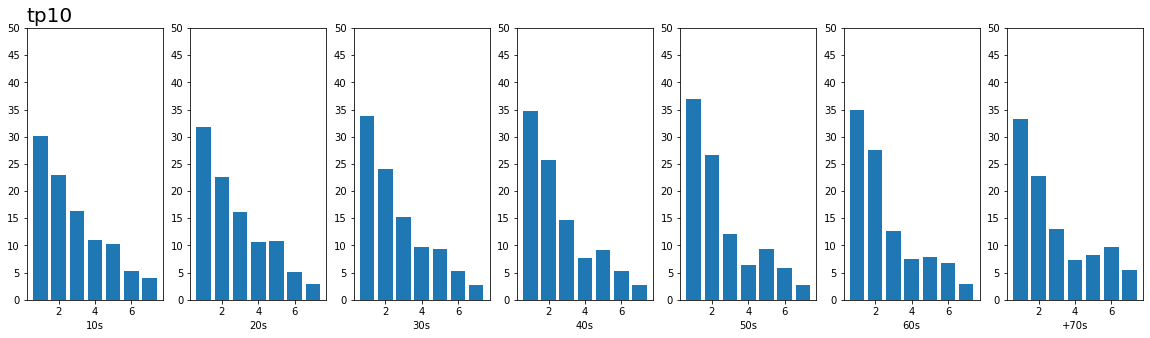

In [58]:
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']:
    personality_age_distribution(i)

In [59]:
def personality_age_average(question):    
    #연령대별 답변 평균
    df_1=df[df[question]!=0] #결측치 제거
    pivot1=pd.pivot_table(data=df_1,values=str(question),index='age_group',aggfunc=np.mean)
    pivot1.index=ordered
    print('%s 연령별 응답 평균' %question)
    display(pivot1)
    
    #연령대별 평균 그래프
    plt.figure(figsize=(5,4))
    sns.barplot(x='age_group',y=question,data=df_1,order=ordered)
    plt.ylim(0,7)    

tp01 연령별 응답 평균


,tp01
10s,4.502326
20s,4.002048
30s,3.956213
40s,3.938357
50s,4.086565
60s,4.260976
+70s,4.113617


tp02 연령별 응답 평균


,tp02
10s,3.210280
20s,4.763737
30s,4.602590
40s,4.274276
50s,3.898261
60s,3.521097
+70s,3.251518


tp03 연령별 응답 평균


,tp03
10s,6.044843
20s,5.100383
30s,5.145860
40s,5.334574
50s,5.568118
60s,5.779726
+70s,5.833477


tp04 연령별 응답 평균


,tp04
10s,3.191589
20s,4.150216
30s,4.123942
40s,3.934043
50s,3.711858
60s,3.484188
+70s,3.301299


tp05 연령별 응답 평균


,tp05
10s,5.812785
20s,5.591433
30s,5.747529
40s,5.743659
50s,5.757146
60s,5.768014
+70s,5.739655


tp06 연령별 응답 평균


,tp06
10s,4.449541
20s,4.683872
30s,4.699893
40s,4.425807
50s,4.262822
60s,4.183767
+70s,4.380172


tp07 연령별 응답 평균


,tp07
10s,5.677419
20s,4.637264
30s,4.930387
40s,5.187252
50s,5.438175
60s,5.644640
+70s,5.645833


tp08 연령별 응답 평균


,tp08
10s,2.750000
20s,3.900616
30s,3.623530
40s,3.316277
50s,3.055055
60s,2.906977
+70s,2.793582


tp09 연령별 응답 평균


,tp09
10s,5.552995
20s,4.545724
30s,4.702566
40s,4.801128
50s,4.969630
60s,5.185875
+70s,5.396730


tp10 연령별 응답 평균


,tp10
10s,2.861111
20s,2.804519
30s,2.733376
40s,2.629392
50s,2.574660
60s,2.527651
+70s,2.574653


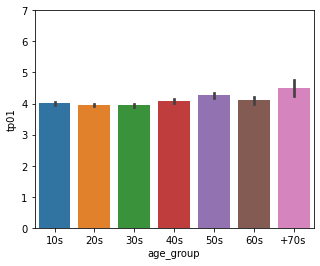

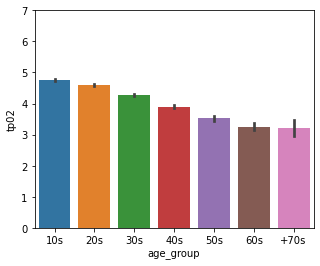

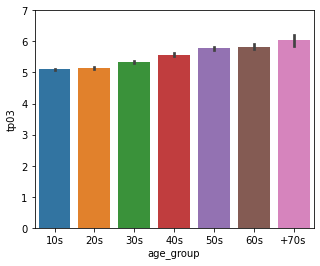

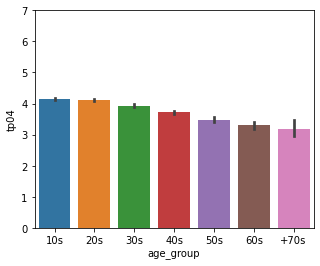

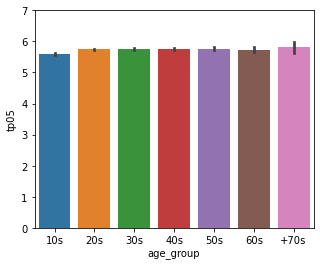

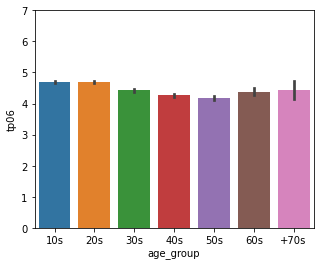

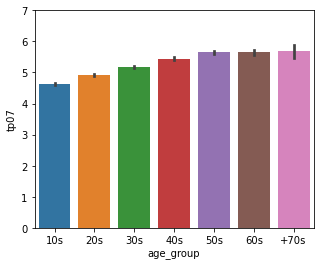

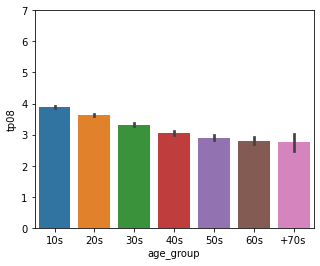

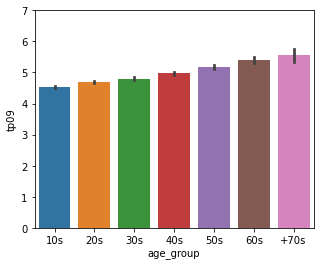

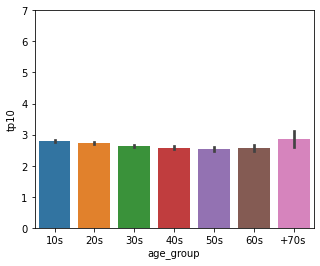

In [60]:
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']:
    personality_age_average(i)

### 5. 연령대-단어 인지
- 단어마다 편차의 차이는 있지만, 실존단어의 경우 연령대가 증가할수록 안다고 답하는 비율이 증가하였다.
- 허구단어의 경우 연령대가 증가할수록 모른다고 답하는 비율이 증가하였다. 

In [66]:
def word_age_distribution(question):
    ordered_includeall=['10s','20s','30s','40s','50s','60s','+70s']
    pivot2=pd.pivot_table(data=df,values=question,columns='age_group',aggfunc=np.mean)
    pivot2=pivot2.reindex(ordered_includeall,axis=1)
    pivot2=round(pivot2*100,1)
    display(pivot2)

In [67]:
for i in ['wr_01','wr_02','wr_03','wr_04','wr_05','wr_06','wr_07','wr_08','wr_09','wr_10','wr_11','wr_12','wr_13']:
    word_age_distribution(i)

age_group,10s,20s,30s,40s,50s,60s,+70s
wr_01,61.2,71.0,76.4,79.2,82.2,85.7,84.3


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_02,91.9,92.1,94.9,96.1,97.3,98.8,96.6


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_03,12.1,17.2,24.0,32.3,40.0,48.5,53.6


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_04,83.2,86.2,88.6,90.5,93.0,95.3,93.2


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_05,84.4,89.1,92.3,95.0,96.9,97.2,97.0


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_06,25.5,35.3,36.1,36.7,37.0,42.5,42.1


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_07,93.1,93.2,94.1,95.0,97.0,97.2,93.6


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_08,96.8,97.1,97.6,97.8,97.9,97.9,96.2


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_09,12.6,18.1,25.7,29.2,31.4,34.8,33.6


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_10,93.1,94.2,95.4,96.6,96.9,98.0,96.6


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_11,28.0,34.6,44.7,54.8,63.7,71.4,75.3


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_12,92.5,94.7,96.1,96.7,97.6,98.3,95.3


age_group,10s,20s,30s,40s,50s,60s,+70s
wr_13,90.8,91.7,93.8,95.3,96.7,97.7,96.6


In [63]:
for i in ['wf_01','wf_02','wf_03']:
    word_age_distribution(i)

age_group,10s,20s,30s,40s,50s,60s,+70s
wf_01,9.7,8.1,6.9,6.5,5.9,5.5,4.7


age_group,10s,20s,30s,40s,50s,60s,+70s
wf_02,18.6,16.2,15.1,15.0,13.8,13.2,12.8


age_group,10s,20s,30s,40s,50s,60s,+70s
wf_03,10.8,12.0,13.0,12.4,12.6,10.9,10.2


### 6. crawling으로 가설 세우고 확인하기

In [6]:
import requests
from bs4 import BeautifulSoup

In [8]:
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
url='https://brunch.co.kr/@exceo/65'

In [9]:
res=requests.get(url,headers=headers)
res.raise_for_status()
soup=BeautifulSoup(res.text,'lxml')

In [10]:
soup

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>BIG5 성격 특성에 대한 탐색</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="BIG5 성격 특성에 대한 탐색" name="title"/>
<meta content="always" name="referrer"/>
<meta name="secureToken" value="TlnGylom6zec4fRJvSrUMvauHT/W9PP6I2iBC9iBOo1I+HWDTa2N1un3/o1fUyNu"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content='- 성격의 5대 특성은 무엇인가요? | 현대의 많은 성격 심리학자들은 종종 "BIG5"성격 특성이라고 불리는 5가지 기본 성격 차원이 있다고 믿습니다. 이론이 설명하는 다섯 가지 성격 특성은 외향성, 친화성, 개방성, 성실성, 신경증입니다  성격 연구자들은 얼마나 많은 성격 특성이 존재하는지 정확히 파악하려고 오랫동안 시도해왔습니다. 초기 이론은 Gordon Allport 4,000개의 성격 특' name="description"/>
<meta content="정경희박사" property="article:author"/>
<meta content="정경희박사" name="og:article:author"/>
<meta content="정경희박사" name="byl"/>
<meta content="article" property="og:type"/>
<meta content="brunch" property="og:site_name"/>
<meta co

In [18]:
content=soup.findAll('h4',attrs={'class':'wrap_item item_type_text'})

In [20]:
content

[<h4 class="wrap_item item_type_text" data-app='{"type":"text","data":[{"type":"text","text":"현대의 많은 성격 심리학자들은 종종 \"BIG5\"성격 특성이라고 불리는 5가지 기본 성격 차원이 있다고 믿습니다. 이론이 설명하는 다섯 가지 성격 특성은 외향성, 친화성, 개방성, 성실성, 신경증입니다"}],"size":"h4"}'>현대의 많은 성격 심리학자들은 종종 "BIG5"성격 특성이라고 불리는 5가지 기본 성격 차원이 있다고 믿습니다. 이론이 설명하는 다섯 가지 성격 특성은 외향성, 친화성, 개방성, 성실성, 신경증입니다</h4>,
 <h4 class="wrap_item item_type_text" data-app='{"type":"text","data":[{"type":"br"}],"size":"h4"}'><br/></h4>,
 <h4 class="wrap_item item_type_text" data-app='{"type":"text","data":[{"type":"text","text":"성격 연구자들은 얼마나 많은 성격 특성이 존재하는지 정확히 파악하려고 오랫동안 시도해왔습니다. 초기 이론은 Gordon Allport 4,000개의 성격 특성 목록, Raymond Cattel의 16가지 성격 요인, Hans Eysenck의 3단계 이론을 포함하여 다양한 가능한 특성을 제안했습니다."}],"size":"h4"}'>성격 연구자들은 얼마나 많은 성격 특성이 존재하는지 정확히 파악하려고 오랫동안 시도해왔습니다. 초기 이론은 Gordon Allport 4,000개의 성격 특성 목록, Raymond Cattel의 16가지 성격 요인, Hans Eysenck의 3단계 이론을 포함하여 다양한 가능한 특성을 제안했습니다.</h4>,
 <h4 class="wrap_item item_type_text" data-app='{"type":"text","data":[{"type":"br"}],"size"

In [22]:
for a in content:
    text=a.get_text()
    print(text)

현대의 많은 성격 심리학자들은 종종 "BIG5"성격 특성이라고 불리는 5가지 기본 성격 차원이 있다고 믿습니다. 이론이 설명하는 다섯 가지 성격 특성은 외향성, 친화성, 개방성, 성실성, 신경증입니다

성격 연구자들은 얼마나 많은 성격 특성이 존재하는지 정확히 파악하려고 오랫동안 시도해왔습니다. 초기 이론은 Gordon Allport 4,000개의 성격 특성 목록, Raymond Cattel의 16가지 성격 요인, Hans Eysenck의 3단계 이론을 포함하여 다양한 가능한 특성을 제안했습니다.

다수의 다른 연구자들은 Cattell의 이론이 너무 복잡하고 Eysenck의 범위가 너무 제한적이라고 생각했습니다. 그 결과, 성격의 구성 요소 역할을 하는 필수 특성을 설명하기 위해 5 요인 이론이 등장했습니다.

오늘날 많은 연구자들은 5가지 핵심 성격 특성이 있다고 믿습니다. ﻿﻿ 이 이론의 증거는 피스크(1949)의 연구를 시작으로 몇 년 동안 성장하고 나중에 노먼(1967), 스미스(1967), 골드버그(1981),  McCrae & Costa (1987)를 포함한 다른 연구자에 확장되었습니다.

"BIG 5"는 성격 특성의 광범위한 범주입니다. 
이 5 단계 성격 모델을 뒷받침하는 많은 문헌이 있지만 연구자들은 각 차원의 정확한 레이블에 항상 동의하지는 않습니다. BIG5 특성을 기억하려고 할 때 약어 OCEAN (개방성, 성실성, 외향성, 친화성, 신경증)을 사용하는 것이 도움이 될 수 있습니다. CANOE (성실성, 친화성, 신경증, 개방성 및 외향성)는 일반적으로 사용되는 또 다른 약어입니다.

다섯 가지 성격 요인 각각이 두 극단 사이의 범위를 나타냄을 유의하는 것이 중요합니다. 예를 들어, 외향성은 극도의 외향과 극도의 내향 사이의 연속체를 나타냅니다. 현실 세계에서 대부분의 사람들은 각 차원의 두 극 끝 사이 어딘가에 있습니다.

개방성
이 특성은 상상력과 통찰력과 같은 특징이 있습니다. ﻿ 이 특성에 높은 사람들은 또한 넓은 범위의 관심을 가

### 가설: 나이-성격특성
- 나이가 들어감에 따라 외향성, 신경증 및 경험에 덜 개방적인 경향이 있습니다. 
- 반면에 친화성과 성실성은 나이가 들면서 증가하는 경향이 있습니다.
<br>

> <strong> 친화성, 성실성, 신경증의 경우에는 성립하지만, 외향성은 연령대에 따라 큰 차이를 보이지 않는다.

### 가설: 나이-마키아벨리성향
- 남녀간의 차이 없었다.
- 25세 미만이 25세 이상보다 마키아벨리 점수가 더 높다
- 출처: 마키아벨리적 성향이 사회적 책임에 대한 인식에 미치는 영향(김종식)
<br>

> <strong> 연령대가 증가함에 따라 마키아벨리 성향이 더 낮게 나타난다.